In [348]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import ast
from wordcloud import WordCloud

# Generic Plots

### Parkinsons

In [328]:
park_male_df = pd.read_csv('clean_parkinsons_male_condition.csv')
park_male_df = park_male_df.loc[:, ~park_male_df.columns.str.contains('^Unnamed')]
park_male_df.head()

,Run ID,Sex,Age,Country,Condition,Alistipes,Bacteroides,Blautia,Clostridium,Coprococcus,Dorea,Faecalibacterium,Lachnospira,Oscillospira,Parabacteroides,Ruminococcus,Subdoligranulum,Sutterella,Unknown
0,ERR365909,Male,61,Finland,Parkinsons,0.429130,7.95153,0.441752,1.161180,0.416509,0.403887,5.654420,1.438850,4.65733,0.946611,5.28840,6.10880,0.000000,90.3698
1,ERR365910,Male,53,Finland,Parkinsons,0.489687,11.36670,0.000000,2.003260,1.290990,0.638077,5.089780,3.502000,3.93233,0.415492,4.76332,4.34783,0.830984,109.3040
2,ERR365912,Male,66,Finland,Parkinsons,1.345530,30.63360,2.429780,0.966688,0.091443,2.077070,9.627690,1.685170,5.55193,0.431091,5.29066,10.52910,2.259960,21.5545
3,ERR365914,Male,63,Finland,Parkinsons,0.191301,13.66290,0.402739,1.711640,0.000000,0.332259,4.450260,6.141760,3.03061,1.006850,3.27225,4.19855,2.486910,111.7200
4,ERR365915,Male,72,Finland,Parkinsons,0.718898,43.93810,0.121847,4.362130,1.291580,0.255879,0.962593,0.718898,1.76678,3.204580,4.30121,1.63275,1.657120,49.4212


In [329]:
park_female_df = pd.read_csv('clean_parkinsons_female_condition.csv')
park_female_df = park_female_df.loc[:, ~park_female_df.columns.str.contains('^Unnamed')]
park_female_df.head()

,Run ID,Sex,Age,Country,Condition,Alistipes,Anaerostipes,Bacteroides,Blautia,Clostridium,Coprococcus,Dorea,Faecalibacterium,Lachnospira,Oscillospira,Parabacteroides,Ruminococcus,Subdoligranulum,Sutterella,Unknown
0,ERR365911,Female,73,Finland,Parkinsons,3.349840,0.625652,28.36290,0.091241,0.00000,0.130344,0.364964,1.029720,0.091241,6.24348,4.053700,8.66788,1.61627,2.86757,65.0156
1,ERR365913,Female,64,Finland,Parkinsons,0.095625,0.083672,7.75759,1.016020,3.50227,0.000000,0.000000,0.394454,0.382501,5.67774,15.790100,5.68970,4.09993,0.00000,95.6969
2,ERR365918,Female,73,Finland,Parkinsons,0.208932,0.352572,13.28020,2.415770,1.94568,0.117524,3.042570,6.685820,3.786890,6.26796,0.378689,8.33116,3.40820,1.37112,72.6822
3,ERR365919,Female,64,Finland,Parkinsons,4.600870,0.296830,13.90860,1.060110,1.06011,1.696170,0.614863,3.795190,3.720980,10.24060,3.031910,13.80260,8.89431,0.00000,55.8465
4,ERR365921,Female,66,Finland,Parkinsons,0.726216,0.319535,28.35150,3.311550,4.11038,0.610022,0.610022,15.802500,3.006540,2.16412,4.037760,2.64343,5.73711,0.43573,39.5062


In [186]:
park_female_bacteria_df = park_female_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
summ_bacteria_park_female = park_female_bacteria_df.sum(axis=0)
summ_t_bacteria_park_female = pd.DataFrame(summ_bacteria_park_female).T

sorted_indices_bact_park_female = np.argsort(summ_t_bacteria_park_female.values.flatten())[::-1]

summ_t_sorted_bacteria_park_female = summ_t_bacteria_park_female.iloc[0, sorted_indices_bact_park_female]
#print(summ_t_sorted_bacteria_park_female)

park_male_bacteria_df = park_male_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)

summ_bacteria_park_male = park_male_bacteria_df.sum(axis=0)
summ_t_bacteria_park_male = pd.DataFrame(summ_bacteria_park_male).T

sorted_indices_bact_park_male = np.argsort(summ_t_bacteria_park_male.values.flatten())[::-1]

summ_t_sorted_bacteria_park_male = summ_t_bacteria_park_male.iloc[0, sorted_indices_bact_park_male]
#print(summ_t_sorted_bacteria_park_male)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/1505650380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_park_female, orient='h', palette="pastel", ax=axes[0, 0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/1505650380.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_park_male, orient='h', palette="Spectral", ax=axes[0, 1])


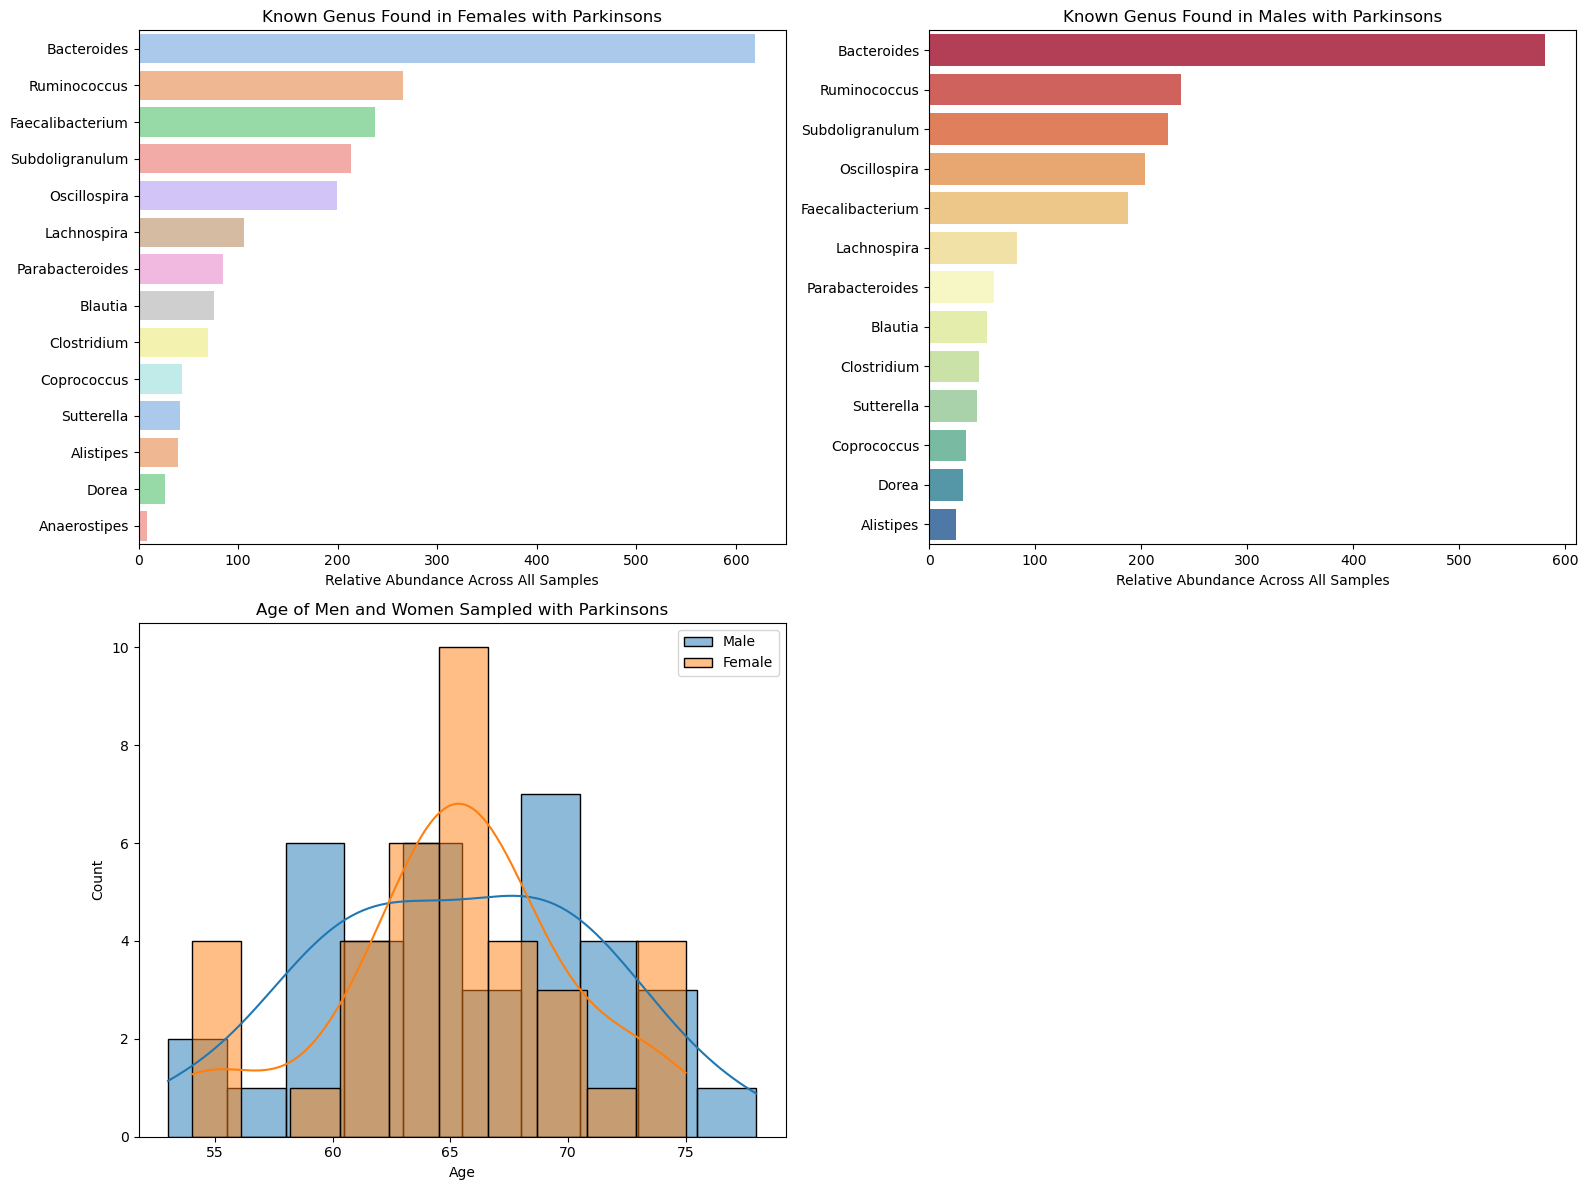

In [311]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(summ_t_sorted_bacteria_park_female, orient='h', palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title('Known Genus Found in Females with Parkinsons')
axes[0, 0].set_xlabel('Relative Abundance Across All Samples')

sns.barplot(summ_t_sorted_bacteria_park_male, orient='h', palette="Spectral", ax=axes[0, 1])
axes[0, 1].set_title('Known Genus Found in Males with Parkinsons')
axes[0, 1].set_xlabel('Relative Abundance Across All Samples')

sns.histplot(park_male_df['Age'], bins=10, kde=True, label='Male', ax=axes[1, 0])
sns.histplot(park_female_df['Age'], bins=10, kde=True, label='Female', ax=axes[1, 0])
axes[1, 0].set_title('Age of Men and Women Sampled with Parkinsons')
axes[1, 0].legend()

fig.delaxes(axes[1, 1])

plt.tight_layout()

plt.savefig('generic_parkinsons_graphs.jpg')

plt.show()

### Alzheimers

In [330]:
alz_male_df = pd.read_csv('clean_alzheimers_male_condition.csv')
alz_male_df = alz_male_df.loc[:, ~alz_male_df.columns.str.contains('^Unnamed')]
alz_male_df.head()

,Run ID,Sex,Age,Country,Condition,Bacteroides,Clostridium,Dorea,Faecalibacterium,Roseburia,Ruminococcus,Streptococcus,Unknown
0,ERR1090510,Male,31,United States of America,Alzheimers,33.489500,0.105034,0.000000,0.008079,0.048477,0.242385,0.016159,18.9626
1,ERR1843463,Male,70,United States of America,"Alzheimers, Autoimmune Diseases",32.812400,0.005280,0.021118,4.070530,0.221741,0.105591,0.337891,42.9544
2,ERR1844528,Male,70,United States of America,"Alzheimers, Autoimmune Diseases",33.701500,0.010935,0.010935,3.947510,0.235101,0.114817,0.355385,42.1542
3,ERR2091834,Male,56,United Kingdom,Alzheimers,0.373625,0.236805,0.036836,3.194230,0.031574,0.273641,0.010525,11.7560
4,SRR9671458,Male,64,China,Alzheimers,0.027799,0.125096,0.000000,0.896518,0.979915,0.576829,0.500382,183.0010


In [331]:
alz_female_df = pd.read_csv('clean_alzheimers_female_condition.csv')
alz_female_df = alz_female_df.loc[:, ~alz_female_df.columns.str.contains('^Unnamed')]
alz_female_df.head()

,Run ID,Sex,Age,Country,Condition,Bacteroides,Clostridium,Dorea,Faecalibacterium,Roseburia,Ruminococcus,Streptococcus,Unknown
0,ERR1160800,Female,53,United States of America,"Alzheimers, Migrane Disorders",0.855109,0.097860,0.040775,9.801140,0.025630,0.445030,4.657670,40.5105
1,ERR2091942,Female,53,United Kingdom,"Alzheimers, Intestinal Diseases",12.921200,0.321601,0.017867,15.172400,0.078614,0.360908,0.007147,35.6012
2,SRR9671487,Female,67,China,Alzheimers,8.114520,1.053260,0.000000,0.000000,0.000000,0.000000,1.646640,170.0640
3,SRR9671488,Female,80,China,Alzheimers,9.345410,2.009400,9.733670,0.422315,0.463184,7.969480,3.099240,114.2700
4,SRR9671489,Female,57,China,Alzheimers,2.975540,11.233200,0.000000,0.000000,0.000000,0.000000,0.219670,91.3630


In [190]:
alz_female_bacteria_df = alz_female_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
summ_bacteria_alz_female = alz_female_bacteria_df.sum(axis=0)
summ_t_bacteria_alz_female = pd.DataFrame(summ_bacteria_alz_female).T

sorted_indices_bact_alz_female = np.argsort(summ_t_bacteria_alz_female.values.flatten())[::-1]

summ_t_sorted_bacteria_alz_female = summ_t_bacteria_alz_female.iloc[0, sorted_indices_bact_alz_female]
summ_t_sorted_bacteria_alz_female

alz_male_bacteria_df = alz_male_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)

summ_bacteria_alz_male = alz_male_bacteria_df.sum(axis=0)
summ_t_bacteria_alz_male = pd.DataFrame(summ_bacteria_alz_male).T

sorted_indices_bact_alz_male = np.argsort(summ_t_bacteria_alz_male.values.flatten())[::-1]

summ_t_sorted_bacteria_alz_male = summ_t_bacteria_alz_male.iloc[0, sorted_indices_bact_alz_male]
summ_t_sorted_bacteria_alz_male

Ruminococcus        228.807013
Faecalibacterium    204.395487
Bacteroides         193.163184
Roseburia           141.334793
Clostridium         125.822505
Streptococcus        50.304031
Dorea                39.452699
Name: 0, dtype: float64

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/4076479998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_alz_female, orient='h', palette="pastel", ax=axes[0, 0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/4076479998.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_alz_male, orient='h', palette="Spectral", ax=axes[0, 1])


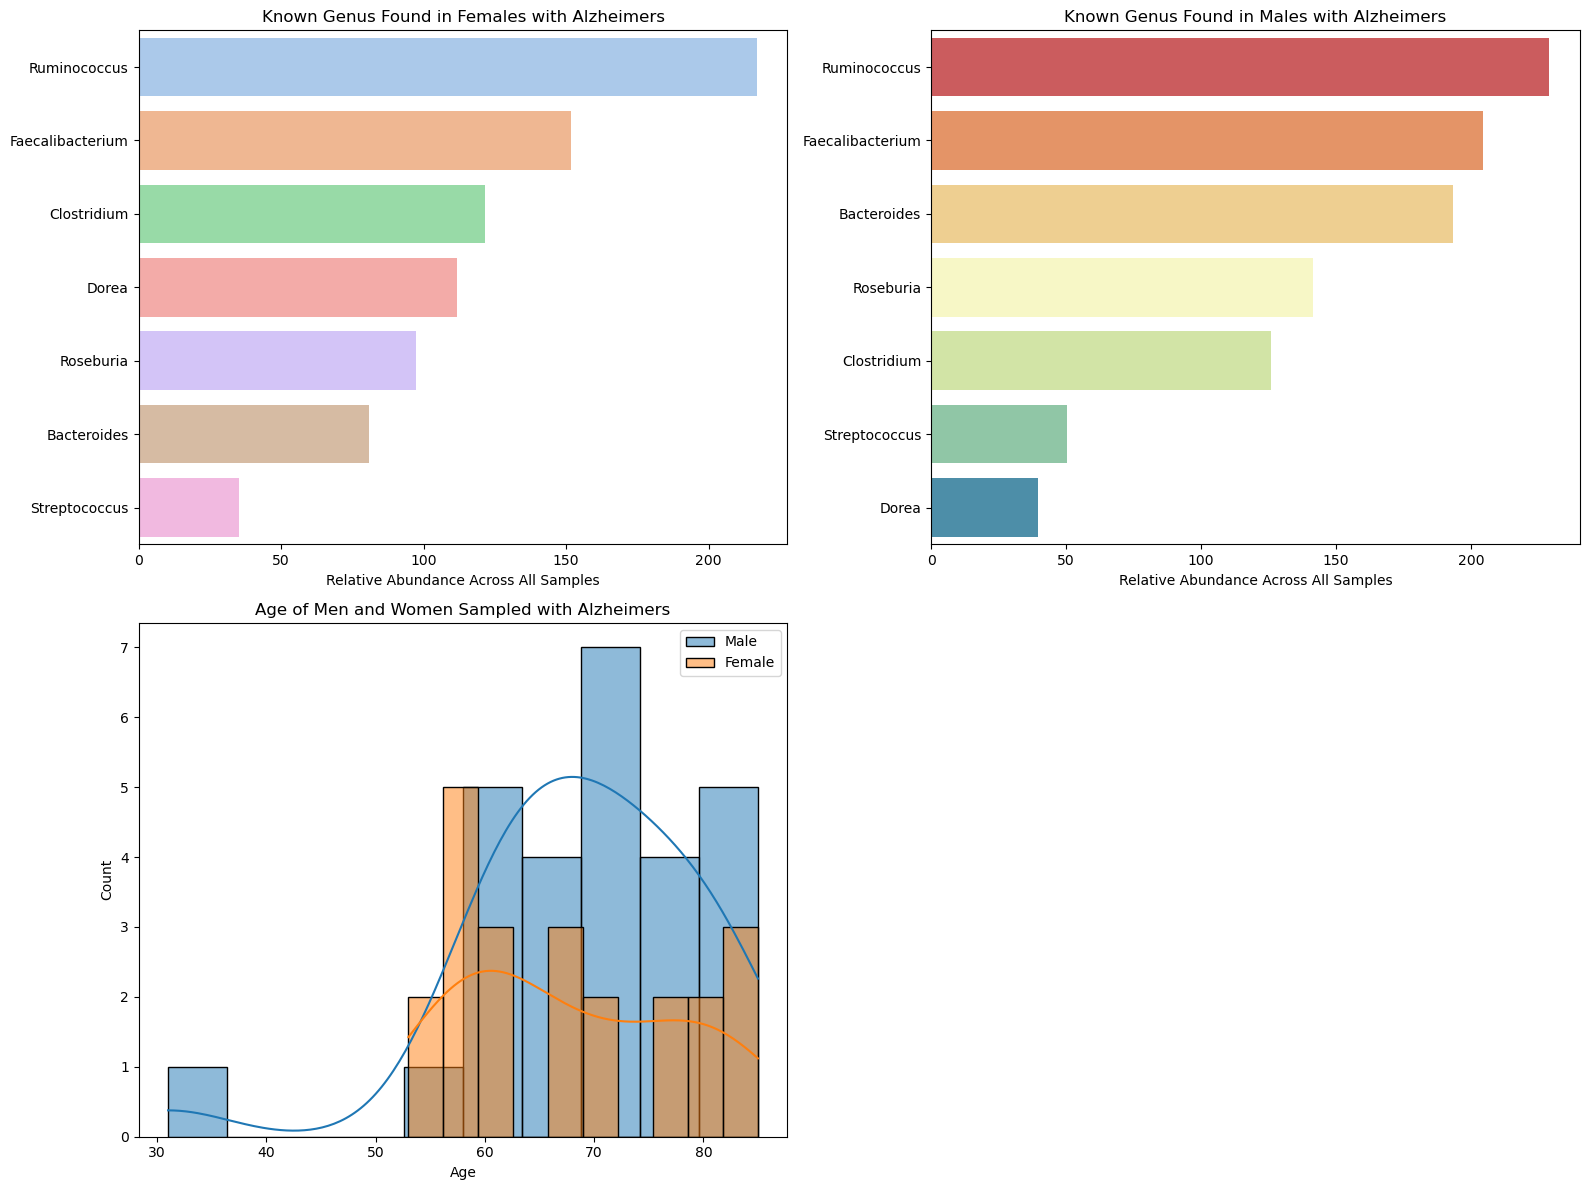

In [219]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(summ_t_sorted_bacteria_alz_female, orient='h', palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title('Known Genus Found in Females with Alzheimers')
axes[0, 0].set_xlabel('Relative Abundance Across All Samples')

sns.barplot(summ_t_sorted_bacteria_alz_male, orient='h', palette="Spectral", ax=axes[0, 1])
axes[0, 1].set_title('Known Genus Found in Males with Alzheimers')
axes[0, 1].set_xlabel('Relative Abundance Across All Samples')

sns.histplot(alz_male_df['Age'], bins=10, kde=True, label='Male', ax=axes[1, 0])
sns.histplot(alz_female_df['Age'], bins=10, kde=True, label='Female', ax=axes[1, 0])
axes[1, 0].set_title('Age of Men and Women Sampled with Alzheimers')
axes[1, 0].legend()

fig.delaxes(axes[1, 1])

plt.tight_layout()

plt.savefig('generic_alzheimers_graphs.jpg')

plt.show()

### Schizophrenia

In [332]:
sch_male_df = pd.read_csv('clean_schizophrenia_male_condition.csv')
sch_male_df = sch_male_df.loc[:, ~sch_male_df.columns.str.contains('^Unnamed')]
sch_male_df.head()

,Run ID,Sex,BMI,Age,Country,Condition,Akkermansia,Alistipes,Anaerofilum,Anaerotruncus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1072629,Male,17.67,64,United States of America,"Bipolar Disorder, Depression, Intestinal Disea...",2.158450,17.50470,0.033877,0.159706,...,1.408310,1.974540,11.494000,0.029037,0.024198,0.503315,1.456710,0.198422,0.004840,21.9813
1,ERR1072937,Male,26.51,53,United States of America,"Bipolar Disorder, Cardiovascular Diseases, Dep...",0.031791,1.01733,0.005299,0.105971,...,0.243734,0.927251,0.222540,0.052986,41.169900,0.090076,0.021194,0.111270,0.598739,10.1733
2,ERR1073491,Male,28.08,49,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.176768,5.60290,0.025253,0.126263,...,2.077020,0.656566,3.936240,0.022096,0.018939,0.407197,6.177400,0.085227,0.050505,11.0574
3,ERR1075554,Male,30.74,62,United States of America,"Attention Deficit Disorder with Hyperactivity,...",0.360811,3.15526,0.044181,0.191451,...,0.250359,2.032330,0.025772,0.147270,0.003682,1.395380,0.209860,0.224587,0.206178,25.9674
4,ERR1075686,Male,45.84,56,United States of America,"Bipolar Disorder, Depression, Lung Diseases, S...",0.037344,4.91069,0.012448,1.163880,...,0.485467,0.553930,1.350590,0.024896,1.674240,0.149374,1.275910,0.908695,0.037344,55.3059


In [333]:
sch_female_df = pd.read_csv('clean_schizophrenia_female_condition.csv')
sch_female_df = sch_female_df.loc[:, ~sch_female_df.columns.str.contains('^Unnamed')]
sch_female_df.head()

,Run ID,Sex,BMI,Age,Country,Condition,Akkermansia,Alistipes,Anaerotruncus,Bacillus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1073023,Female,34.72,35,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.005583,3.41670,0.904422,3.612100,...,0.022331,0.614113,3.818670,0.027914,0.005583,1.747430,1.574360,0.217731,0.206565,28.21010
1,ERR1073394,Female,22.41,27,United States of America,"Autoimmune Diseases, Bipolar Disorder, Depress...",0.005104,6.11698,0.053591,0.030623,...,0.604808,1.253000,1.819530,0.117389,0.005104,1.436740,0.247537,0.010208,0.010208,3.81514
2,ERR1073395,Female,22.41,27,United States of America,"Autoimmune Diseases, Bipolar Disorder, Depress...",0.002470,6.74687,0.069173,0.027175,...,0.140817,1.339000,1.647810,0.027175,0.012352,2.030730,0.303869,0.002470,0.019764,4.92366
3,ERR1073490,Female,25.73,37,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.331675,3.57188,0.290216,0.041459,...,0.424161,2.611940,2.092100,0.031892,0.328486,0.711188,0.373134,0.105243,0.054216,36.50660
4,ERR1073812,Female,29.71,55,United States of America,"Attention Deficit Disorder with Hyperactivity,...",0.005280,3.12022,0.068634,0.021118,...,0.211182,0.628267,0.950319,2.418040,0.047516,0.158387,0.021118,0.036957,0.047516,59.09930


In [194]:
sch_female_bacteria_df = sch_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], 
                                            axis=1)
summ_bacteria_sch_female = sch_female_bacteria_df.sum(axis=0)
summ_t_bacteria_sch_female = pd.DataFrame(summ_bacteria_sch_female).T

sorted_indices_bact_sch_female = np.argsort(summ_t_bacteria_sch_female.values.flatten())[::-1]

summ_t_sorted_bacteria_sch_female = summ_t_bacteria_sch_female.iloc[0, sorted_indices_bact_sch_female]
#print(summ_t_sorted_bacteria_sch_female)

sch_male_bacteria_df = sch_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)

summ_bacteria_sch_male = sch_male_bacteria_df.sum(axis=0)
summ_t_bacteria_sch_male = pd.DataFrame(summ_bacteria_sch_male).T

sorted_indices_bact_sch_male = np.argsort(summ_t_bacteria_sch_male.values.flatten())[::-1]

summ_t_sorted_bacteria_sch_male = summ_t_bacteria_sch_male.iloc[0, sorted_indices_bact_sch_male]
#print(summ_t_sorted_bacteria_sch_male)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/604058369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_sch_female, orient='h', palette="pastel", ax=axes[0, 0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/604058369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_sch_male, orient='h', palette="Spectral", ax=axes[0, 1])


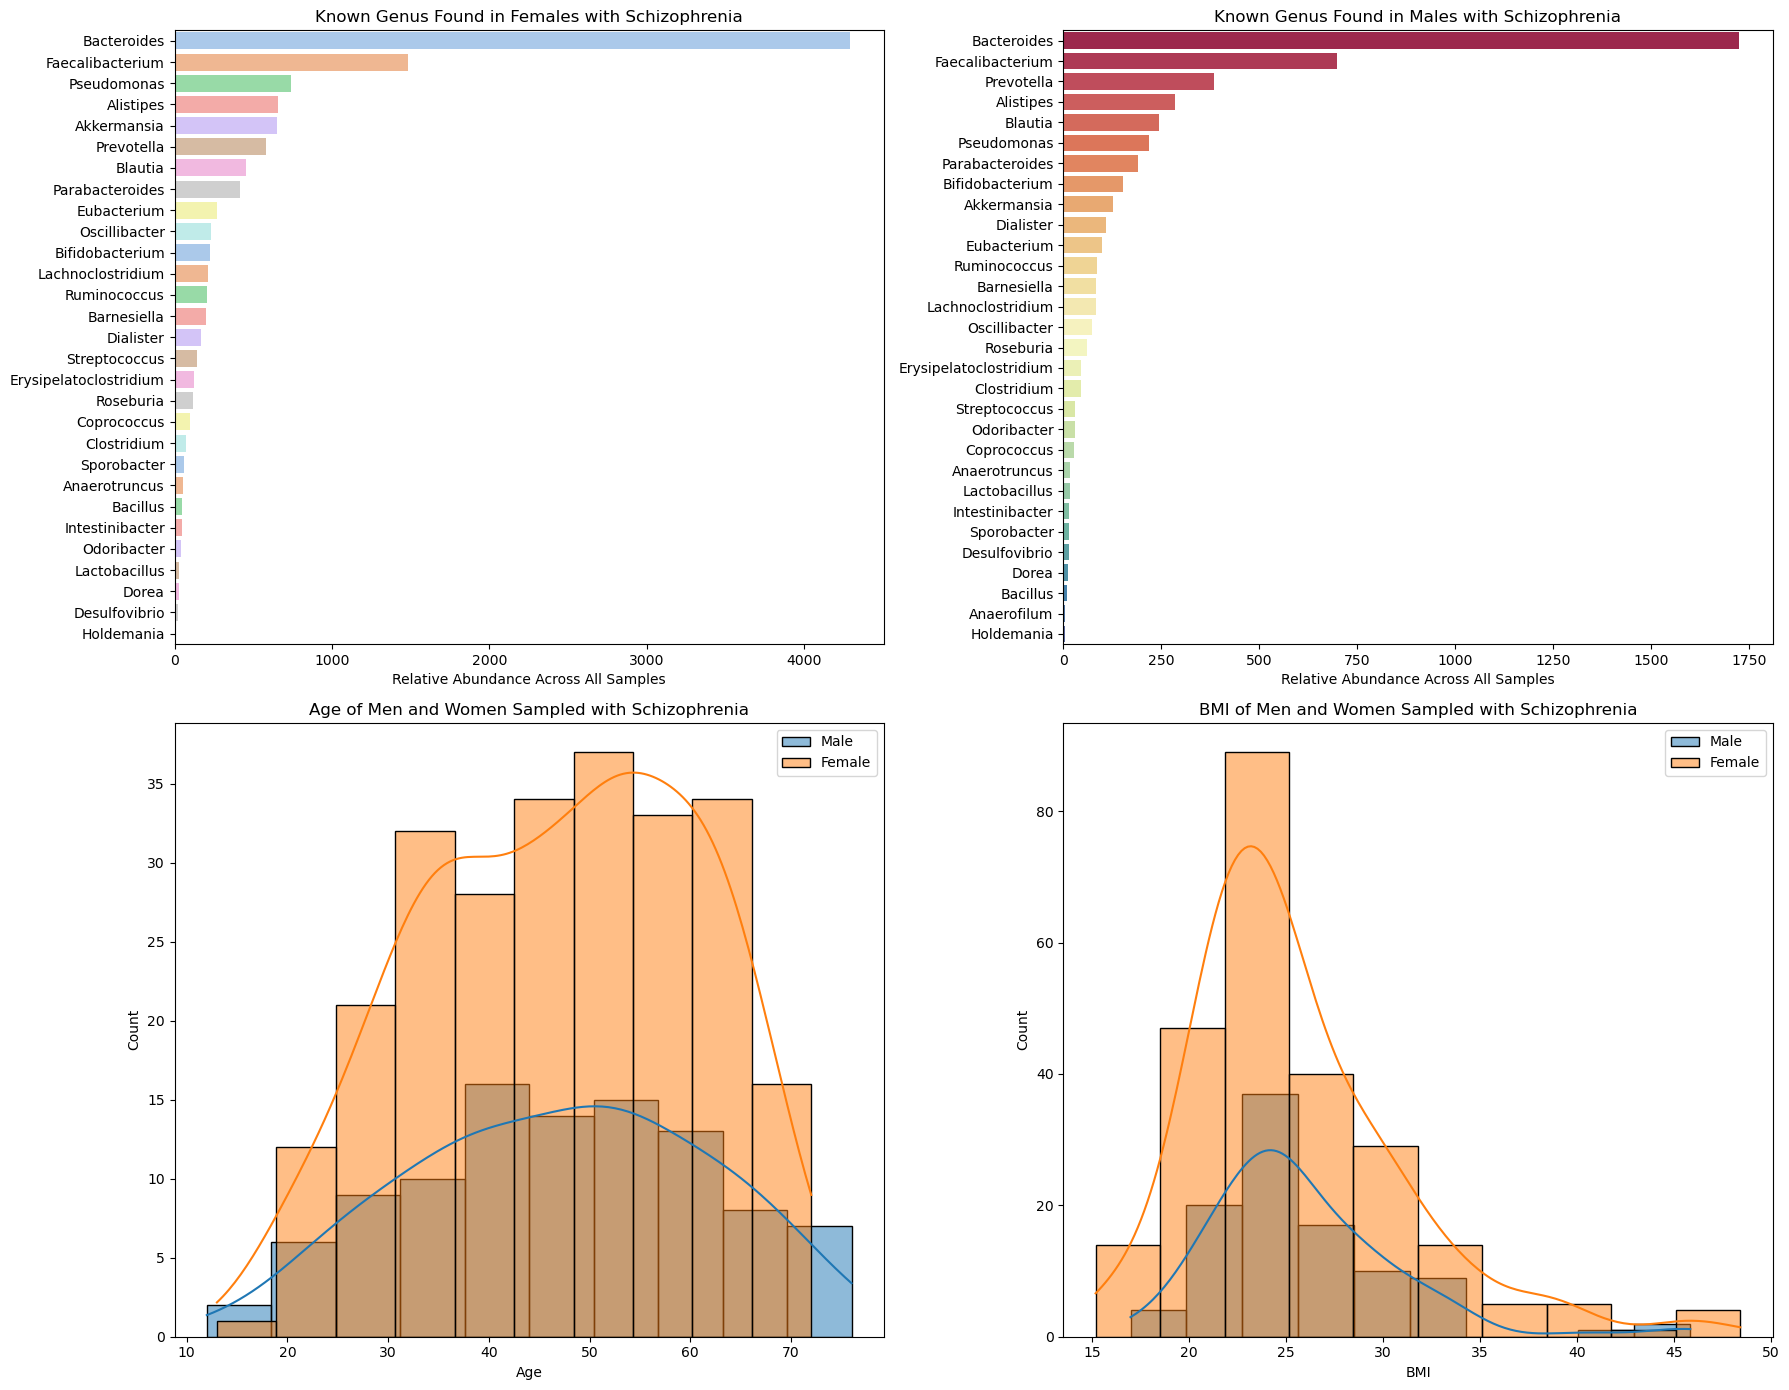

In [220]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sns.barplot(summ_t_sorted_bacteria_sch_female, orient='h', palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title('Known Genus Found in Females with Schizophrenia')
axes[0, 0].set_xlabel('Relative Abundance Across All Samples')

sns.barplot(summ_t_sorted_bacteria_sch_male, orient='h', palette="Spectral", ax=axes[0, 1])
axes[0, 1].set_title('Known Genus Found in Males with Schizophrenia')
axes[0, 1].set_xlabel('Relative Abundance Across All Samples')

sns.histplot(sch_male_df['Age'], bins=10, kde=True, label='Male', ax=axes[1, 0])
sns.histplot(sch_female_df['Age'], bins=10, kde=True, label='Female', ax=axes[1, 0])
axes[1, 0].set_title('Age of Men and Women Sampled with Schizophrenia')
axes[1, 0].legend()

sns.histplot(sch_male_df['BMI'], bins=10, kde=True, label='Male', ax=axes[1, 1])
sns.histplot(sch_female_df['BMI'], bins=10, kde=True, label='Female', ax=axes[1, 1])
axes[1, 1].set_title('BMI of Men and Women Sampled with Schizophrenia')
axes[1, 1].legend()

plt.tight_layout()

plt.savefig('generic_schizophrenia_graphs.jpg')

plt.show()

### Bipolar

In [334]:
bi_male_df = pd.read_csv('clean_bipolar_male_condition.csv')
bi_male_df = bi_male_df.loc[:, ~bi_male_df.columns.str.contains('^Unnamed')]
bi_male_df.head()

,Run ID,Sex,BMI,Age,Country,Condition,Akkermansia,Alistipes,Anaerofilum,Anaerotruncus,...,Lachnoclostridium,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1072629,Male,17.67,64,United States of America,"Bipolar Disorder, Depression, Intestinal Disea...",2.158450,17.50470,0.033877,0.159706,...,1.234090,1.408310,1.974540,11.494000,0.029037,0.503315,1.456710,0.198422,0.004840,21.9813
1,ERR1072937,Male,26.51,53,United States of America,"Bipolar Disorder, Cardiovascular Diseases, Dep...",0.031791,1.01733,0.005299,0.105971,...,0.328512,0.243734,0.927251,0.222540,0.052986,0.090076,0.021194,0.111270,0.598739,10.1733
2,ERR1073491,Male,28.08,49,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.176768,5.60290,0.025253,0.126263,...,2.607320,2.077020,0.656566,3.936240,0.022096,0.407197,6.177400,0.085227,0.050505,11.0574
3,ERR1075554,Male,30.74,62,United States of America,"Attention Deficit Disorder with Hyperactivity,...",0.360811,3.15526,0.044181,0.191451,...,3.416660,0.250359,2.032330,0.025772,0.147270,1.395380,0.209860,0.224587,0.206178,25.9674
4,ERR1075686,Male,45.84,56,United States of America,"Bipolar Disorder, Depression, Lung Diseases, S...",0.037344,4.91069,0.012448,1.163880,...,0.304973,0.485467,0.553930,1.350590,0.024896,0.149374,1.275910,0.908695,0.037344,55.3059


In [335]:
bi_female_df = pd.read_csv('clean_bipolar_female_condition.csv')
bi_female_df = bi_female_df.loc[:, ~bi_female_df.columns.str.contains('^Unnamed')]
bi_female_df.head()

,Run ID,Sex,BMI,Age,Country,Condition,Akkermansia,Alistipes,Anaerotruncus,Bacillus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Roseburia,Ruminiclostridium,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1073023,Female,34.72,35,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.005583,3.41670,0.904422,3.612100,...,0.022331,0.614113,3.818670,0.027914,1.747430,1.110990,1.574360,0.217731,0.206565,28.21010
1,ERR1073394,Female,22.41,27,United States of America,"Autoimmune Diseases, Bipolar Disorder, Depress...",0.005104,6.11698,0.053591,0.030623,...,0.604808,1.253000,1.819530,0.117389,1.436740,0.165876,0.247537,0.010208,0.010208,3.81514
2,ERR1073395,Female,22.41,27,United States of America,"Autoimmune Diseases, Bipolar Disorder, Depress...",0.002470,6.74687,0.069173,0.027175,...,0.140817,1.339000,1.647810,0.027175,2.030730,0.185286,0.303869,0.002470,0.019764,4.92366
3,ERR1073490,Female,25.73,37,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.331675,3.57188,0.290216,0.041459,...,0.424161,2.611940,2.092100,0.031892,0.711188,0.369945,0.373134,0.105243,0.054216,36.50660
4,ERR1073812,Female,29.71,55,United States of America,"Attention Deficit Disorder with Hyperactivity,...",0.005280,3.12022,0.068634,0.021118,...,0.211182,0.628267,0.950319,2.418040,0.158387,0.237580,0.021118,0.036957,0.047516,59.09930


In [200]:
bi_female_bacteria_df = bi_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], 
                                            axis=1)
summ_bacteria_bi_female = bi_female_bacteria_df.sum(axis=0)
summ_t_bacteria_bi_female = pd.DataFrame(summ_bacteria_bi_female).T

sorted_indices_bact_bi_female = np.argsort(summ_t_bacteria_bi_female.values.flatten())[::-1]

summ_t_sorted_bacteria_bi_female = summ_t_bacteria_bi_female.iloc[0, sorted_indices_bact_bi_female]
#print(summ_t_sorted_bacteria_bi_female)

bi_male_bacteria_df = bi_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)

summ_bacteria_bi_male = bi_male_bacteria_df.sum(axis=0)
summ_t_bacteria_bi_male = pd.DataFrame(summ_bacteria_bi_male).T

sorted_indices_bact_bi_male = np.argsort(summ_t_bacteria_bi_male.values.flatten())[::-1]

summ_t_sorted_bacteria_bi_male = summ_t_bacteria_bi_male.iloc[0, sorted_indices_bact_bi_male]
#print(summ_t_sorted_bacteria_bi_male)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/3418746384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_bi_female, orient='h', palette="pastel", ax=axes[0, 0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/3418746384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_bi_male, orient='h', palette="Spectral", ax=axes[0, 1])


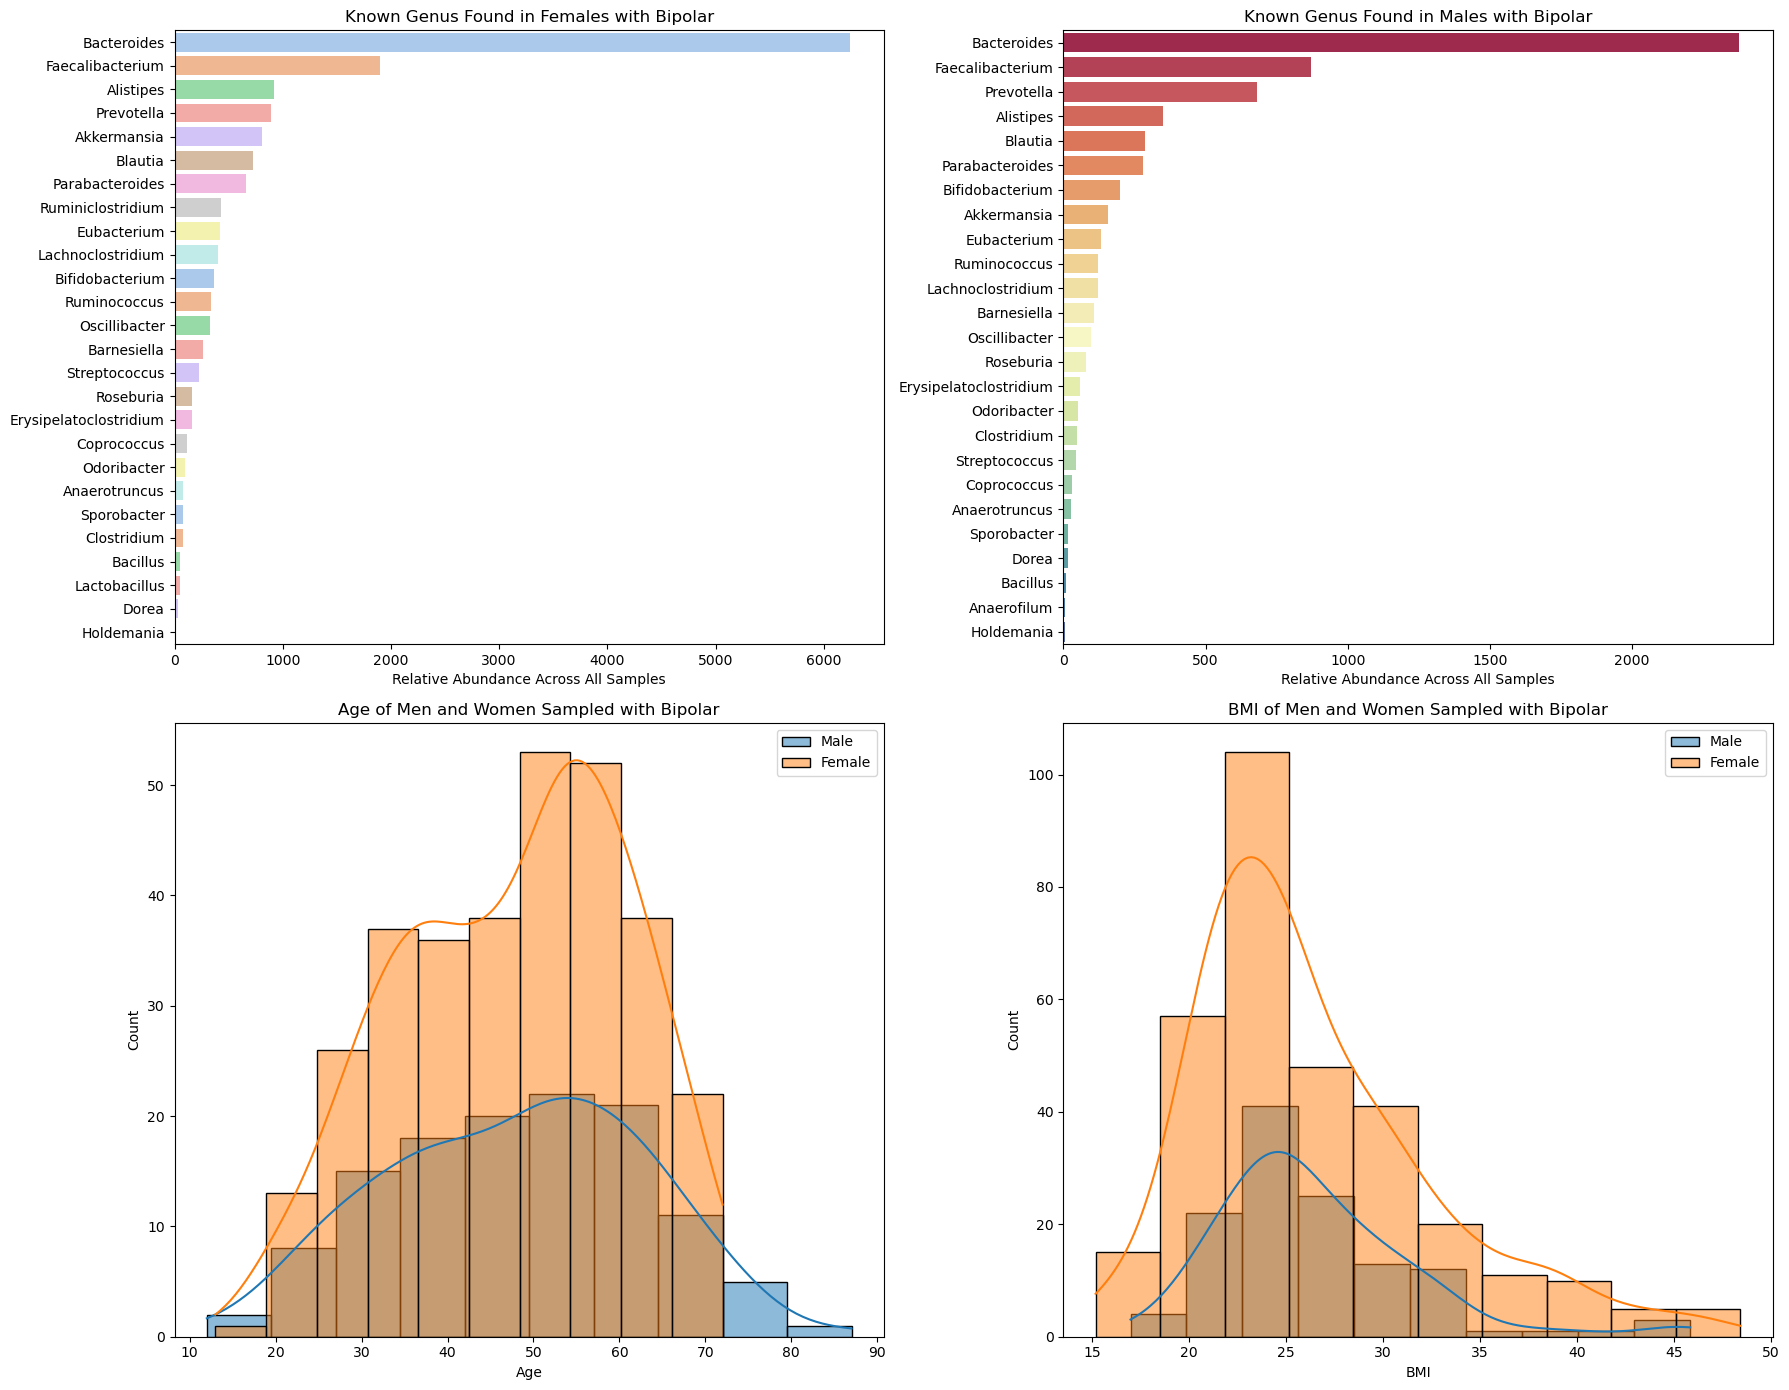

In [221]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sns.barplot(summ_t_sorted_bacteria_bi_female, orient='h', palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title('Known Genus Found in Females with Bipolar')
axes[0, 0].set_xlabel('Relative Abundance Across All Samples')

sns.barplot(summ_t_sorted_bacteria_bi_male, orient='h', palette="Spectral", ax=axes[0, 1])
axes[0, 1].set_title('Known Genus Found in Males with Bipolar')
axes[0, 1].set_xlabel('Relative Abundance Across All Samples')

sns.histplot(bi_male_df['Age'], bins=10, kde=True, label='Male', ax=axes[1, 0])
sns.histplot(bi_female_df['Age'], bins=10, kde=True, label='Female', ax=axes[1, 0])
axes[1, 0].set_title('Age of Men and Women Sampled with Bipolar')
axes[1, 0].legend()

sns.histplot(bi_male_df['BMI'], bins=10, kde=True, label='Male', ax=axes[1, 1])
sns.histplot(bi_female_df['BMI'], bins=10, kde=True, label='Female', ax=axes[1, 1])
axes[1, 1].set_title('BMI of Men and Women Sampled with Bipolar')
axes[1, 1].legend()

plt.tight_layout()

plt.savefig('generic_bipolar_graphs.jpg')

plt.show()

### Epilepsy

In [336]:
ep_male_df = pd.read_csv('clean_epilepsy_male_condition.csv')
ep_male_df = ep_male_df.loc[:, ~ep_male_df.columns.str.contains('^Unnamed')]
ep_male_df.head()

,Run ID,Sex,BMI,Age,Country,Condition,Akkermansia,Alistipes,Bacillus,Bacteroides,...,Lactobacillus,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1072832,Male,24.93,58,United States of America,Epilepsy,2.013640,7.351210,0.024992,26.4344,...,0.003570,1.153200,3.538150,34.935200,0.010711,0.067835,0.253490,0.024992,0.014281,5.95166
1,ERR1076844,Male,21.02,36,United States of America,"Constipation, Epilepsy, Lung Diseases, Thyroid...",0.000000,0.010182,0.010182,37.9514,...,0.000000,0.295276,1.683410,0.162911,0.016970,0.084849,19.960000,0.006788,0.020364,10.56540
2,ERR1089831,Male,22.91,43,United States of America,Epilepsy,0.067717,3.409390,0.032386,18.2717,...,0.144266,1.257180,0.618284,0.020609,0.082438,2.040340,4.869720,0.479906,0.026498,18.87830
3,ERR1089867,Male,15.62,6,Canada,Epilepsy,0.061837,2.360090,0.097908,38.6375,...,0.030918,0.340101,3.998760,0.005153,0.170051,1.221270,11.898400,0.422550,0.530764,14.61920
4,ERR1089868,Male,15.62,6,Canada,Epilepsy,7.840500,4.485890,0.095206,28.1474,...,0.016801,6.546820,1.383290,0.235215,0.000000,1.708110,0.341622,0.403226,0.420027,12.07440


In [337]:
ep_female_df = pd.read_csv('clean_epilepsy_female_condition.csv')
ep_female_df = ep_female_df.loc[:, ~ep_female_df.columns.str.contains('^Unnamed')]
ep_female_df.head()

,Run ID,Sex,BMI,Age,Country,Condition,Acinetobacter,Akkermansia,Alistipes,Anaerofilum,...,Parasutterella,Prevotella,Pseudomonas,Roseburia,Ruminiclostridium,Ruminococcus,Sporobacter,Streptococcus,Unknown,Veillonella
0,ERR1073812,Female,29.71,55,United States of America,"Attention Deficit Disorder with Hyperactivity,...",0.010559,0.005280,3.120220,0.026398,...,0.269257,2.418040,0.047516,0.158387,0.237580,0.021118,0.036957,0.047516,59.0993,0.015839
1,ERR1090471,Female,38.01,47,United States of America,"Autoimmune Diseases, Bipolar Disorder, Constip...",0.012207,0.000000,0.732452,0.036623,...,0.028484,0.000000,0.101729,0.077314,0.183113,0.016277,0.016277,0.109868,75.4873,0.000000
2,ERR1091746,Female,31.09,59,United States of America,"Autoimmune Diseases, Diabetes Mellitus, Epilep...",0.001851,0.009255,0.873670,0.011106,...,0.003702,27.944500,0.007404,0.634891,0.003702,0.732994,0.012957,0.623785,47.5909,0.427580
3,ERR1091758,Female,21.79,62,United States of America,"Attention Deficit Disorder with Hyperactivity,...",0.078793,0.366156,0.104285,0.000000,...,0.020857,0.000000,0.491298,0.002317,0.000000,0.013905,0.000000,0.027809,90.1740,0.000000
4,ERR1160392,Female,35.19,50,United States of America,"Bipolar Disorder, Constipation, Depression, Ep...",0.028054,0.012752,1.713830,0.029329,...,0.001275,0.091812,0.048456,0.386376,0.972954,0.095638,0.132618,0.146644,72.8695,0.020403


In [205]:
ep_female_bacteria_df = ep_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], 
                                            axis=1)
summ_bacteria_ep_female = ep_female_bacteria_df.sum(axis=0)
summ_t_bacteria_ep_female = pd.DataFrame(summ_bacteria_ep_female).T

sorted_indices_bact_ep_female = np.argsort(summ_t_bacteria_ep_female.values.flatten())[::-1]

summ_t_sorted_bacteria_ep_female = summ_t_bacteria_ep_female.iloc[0, sorted_indices_bact_ep_female]
#print(summ_t_sorted_bacteria_ep_female)

ep_male_bacteria_df = ep_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)

summ_bacteria_ep_male = ep_male_bacteria_df.sum(axis=0)
summ_t_bacteria_ep_male = pd.DataFrame(summ_bacteria_ep_male).T

sorted_indices_bact_ep_male = np.argsort(summ_t_bacteria_ep_male.values.flatten())[::-1]

summ_t_sorted_bacteria_ep_male = summ_t_bacteria_ep_male.iloc[0, sorted_indices_bact_ep_male]
#print(summ_t_sorted_bacteria_ep_male)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/2220450826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_ep_female, orient='h', palette="pastel", ax=axes[0, 0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/2220450826.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_ep_male, orient='h', palette="Spectral", ax=axes[0, 1])


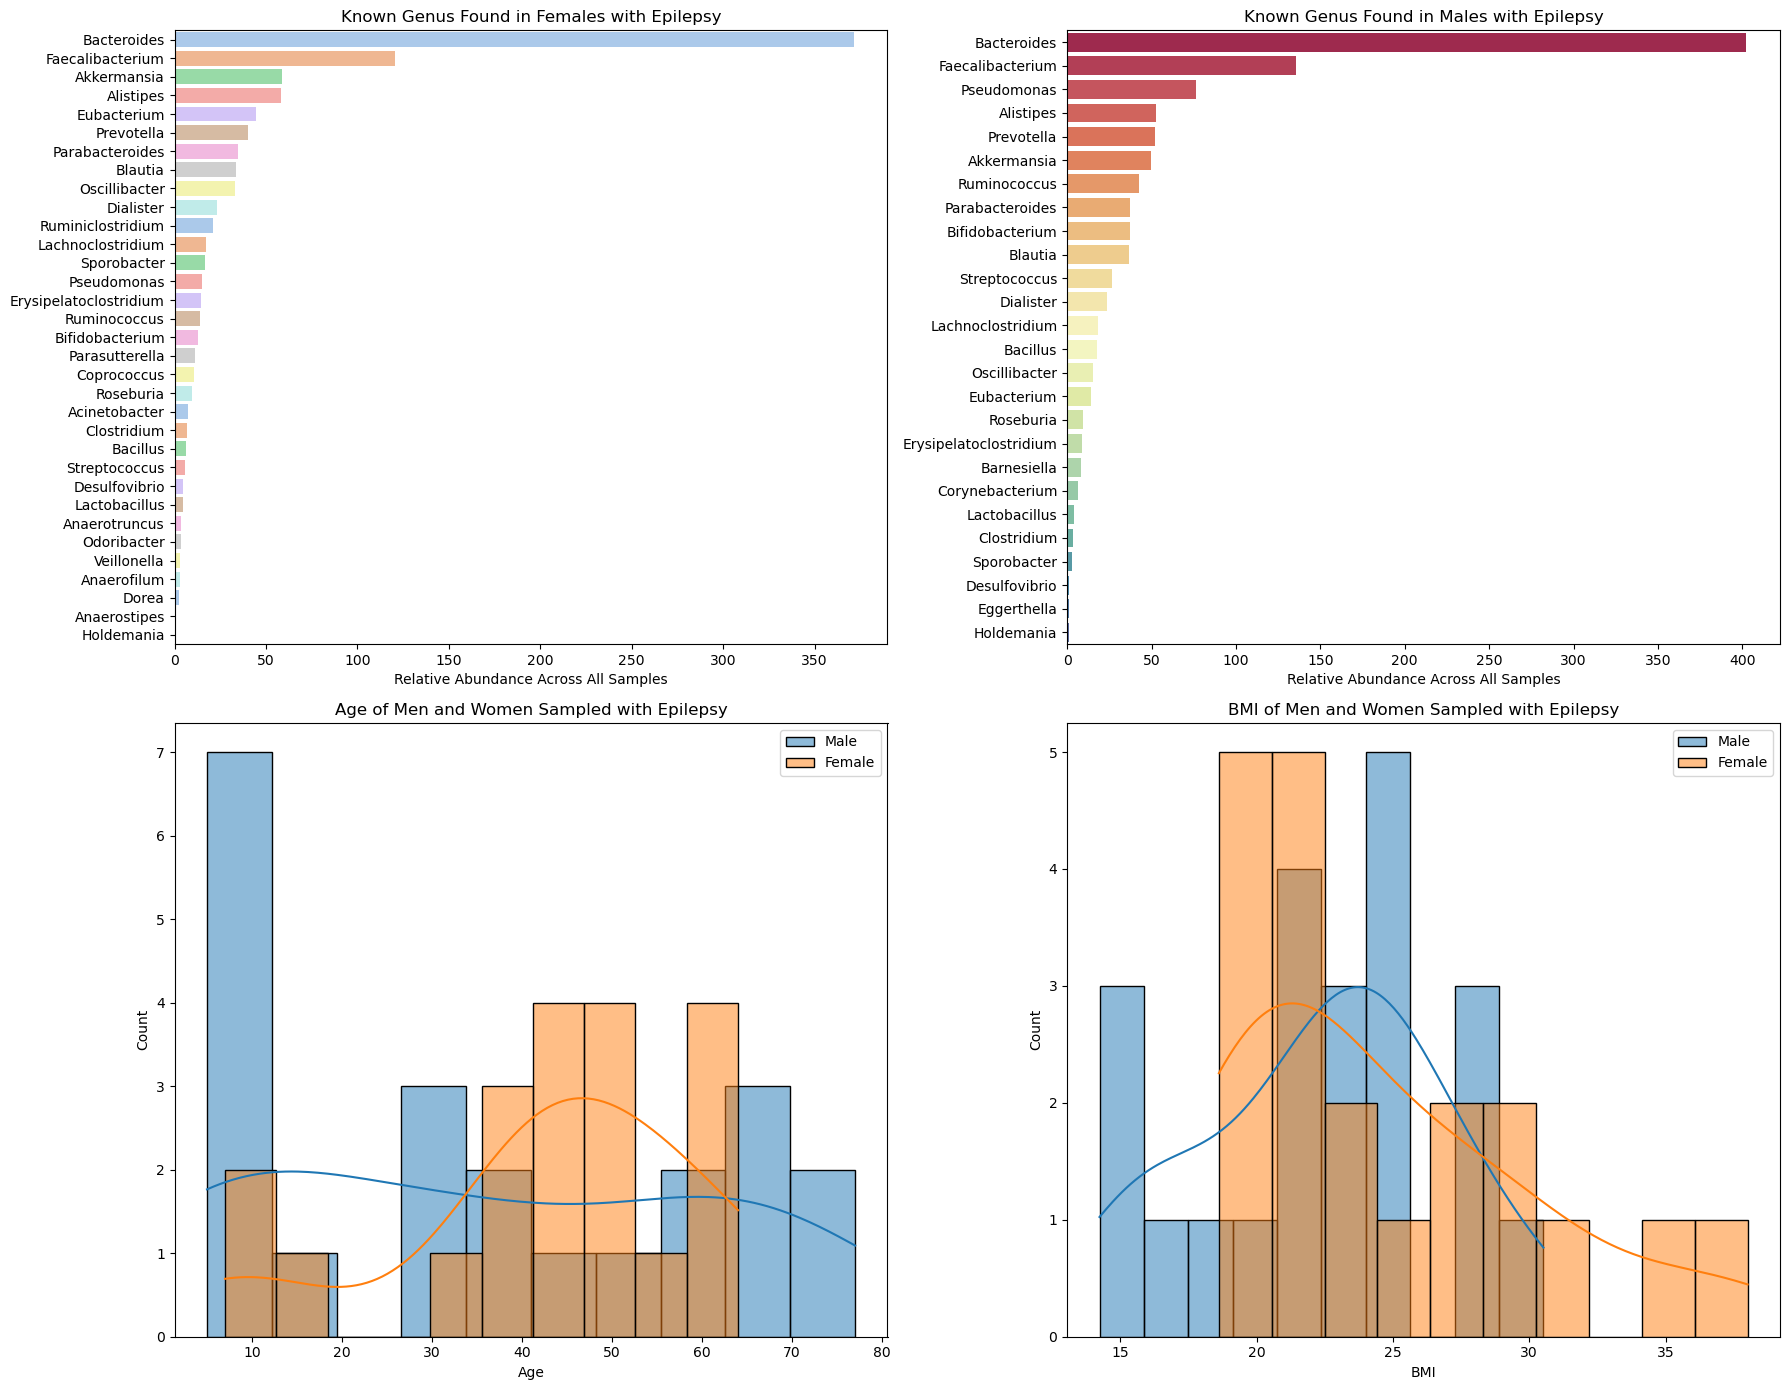

In [223]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sns.barplot(summ_t_sorted_bacteria_ep_female, orient='h', palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title('Known Genus Found in Females with Epilepsy')
axes[0, 0].set_xlabel('Relative Abundance Across All Samples')

sns.barplot(summ_t_sorted_bacteria_ep_male, orient='h', palette="Spectral", ax=axes[0, 1])
axes[0, 1].set_title('Known Genus Found in Males with Epilepsy')
axes[0, 1].set_xlabel('Relative Abundance Across All Samples')

sns.histplot(ep_male_df['Age'], bins=10, kde=True, label='Male', ax=axes[1, 0])
sns.histplot(ep_female_df['Age'], bins=10, kde=True, label='Female', ax=axes[1, 0])
axes[1, 0].set_title('Age of Men and Women Sampled with Epilepsy')
axes[1, 0].legend()

sns.histplot(ep_male_df['BMI'], bins=10, kde=True, label='Male', ax=axes[1, 1])
sns.histplot(ep_female_df['BMI'], bins=10, kde=True, label='Female', ax=axes[1, 1])
axes[1, 1].set_title('BMI of Men and Women Sampled with Epilepsy')
axes[1, 1].legend()

plt.tight_layout()

plt.savefig('generic_epilepsy_graphs.jpg')

plt.show()

### Health

In [338]:
health_male_df = pd.read_csv('clean_health_male_condition.csv')
health_male_df = health_male_df.loc[:, ~health_male_df.columns.str.contains('^Unnamed')]
health_male_df.head()

,Run ID,Sex,Age,Country,Condition,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,Unknown
0,ERR1075960,Male,0.0,United States of America,Health,21.22,2.29105,21.42580,0.376027,0.918747,0.220964,0.042642,0.546596,7.64072,0.922624,1.15522,0.065902,0.798573,30.34970
1,ERR1854747,Male,62.0,United Kingdom,Health,28.70,3.11017,16.46100,1.199210,0.664308,0.155293,0.064705,1.475280,5.86231,3.519970,0.80666,0.526270,2.126650,44.65100
2,ERR688529,Male,63.0,Austria,Health,30.90,6.23950,4.79469,1.940630,5.024630,5.943990,3.159840,18.582300,12.72130,0.224630,0.28063,1.192320,11.999800,0.09314
3,ERR1316059,Male,67.0,United States of America,Health,22.15,6.81649,16.41220,0.703380,1.063650,0.217304,0.011437,0.291645,16.04620,4.100190,2.97936,0.165837,0.337393,21.27290
4,SRR5649200,Male,27.0,United States of America,Health,20.80,6.50140,15.27690,4.559140,3.050310,0.087048,0.168655,1.247690,1.41816,0.491458,1.80081,0.937579,4.733230,37.35270


In [339]:
health_female_df = pd.read_csv('clean_health_female_condition.csv')
health_female_df = health_female_df.loc[:, ~health_female_df.columns.str.contains('^Unnamed')]
health_female_df.head()

,Run ID,Sex,Age,Country,Condition,BMI,Alistipes,Bacteroides,Blautia,Coprococcus,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,Unknown
0,ERR1842901,Female,63.0,United Kingdom,Health,21.0300,2.785190,38.1333,0.865185,4.586670,0.082963,1.197040,14.32300,0.877037,2.37037,0.177778,2.097780,23.52000
1,ERR719035,Female,26.0,Canada,Health,19.0311,3.165750,75.4519,0.105650,0.025270,0.392440,3.792750,3.29535,0.447520,3.77100,0.701160,0.692060,0.08422
2,SRR5648781,Female,21.0,United States of America,Health,20.0000,0.404316,4.4988,1.417090,2.440640,0.004820,0.121919,4.00574,1.730960,0.08024,0.790203,8.842230,60.91800
3,ERR2032350,Female,24.0,United States of America,Health,24.1300,1.680190,24.4199,6.473500,0.776693,0.076084,1.461450,11.41580,0.519909,4.18146,0.786203,3.782020,22.58750
4,ERR1089968,Female,63.0,United States of America,Health,24.6300,3.797760,14.7071,1.121680,0.130957,0.096794,1.520240,3.58139,2.898140,6.18345,0.210670,0.620623,39.64020


In [210]:
health_female_bacteria_df = health_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], 
                                            axis=1)
summ_bacteria_health_female = health_female_bacteria_df.sum(axis=0)
summ_t_bacteria_health_female = pd.DataFrame(summ_bacteria_health_female).T

sorted_indices_bact_health_female = np.argsort(summ_t_bacteria_health_female.values.flatten())[::-1]

summ_t_sorted_bacteria_health_female = summ_t_bacteria_health_female.iloc[0, sorted_indices_bact_health_female]
#print(summ_t_sorted_bacteria_health_female)

health_male_bacteria_df = health_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], 
                                              axis=1)

summ_bacteria_health_male = health_male_bacteria_df.sum(axis=0)
summ_t_bacteria_health_male = pd.DataFrame(summ_bacteria_health_male).T

sorted_indices_bact_health_male = np.argsort(summ_t_bacteria_health_male.values.flatten())[::-1]

summ_t_sorted_bacteria_health_male = summ_t_bacteria_health_male.iloc[0, sorted_indices_bact_health_male]
#print(summ_t_sorted_bacteria_health_male)


/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/408460604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_health_female, orient='h', palette="pastel", ax=axes[0, 0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/408460604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_health_male, orient='h', palette="Spectral", ax=axes[0, 1])


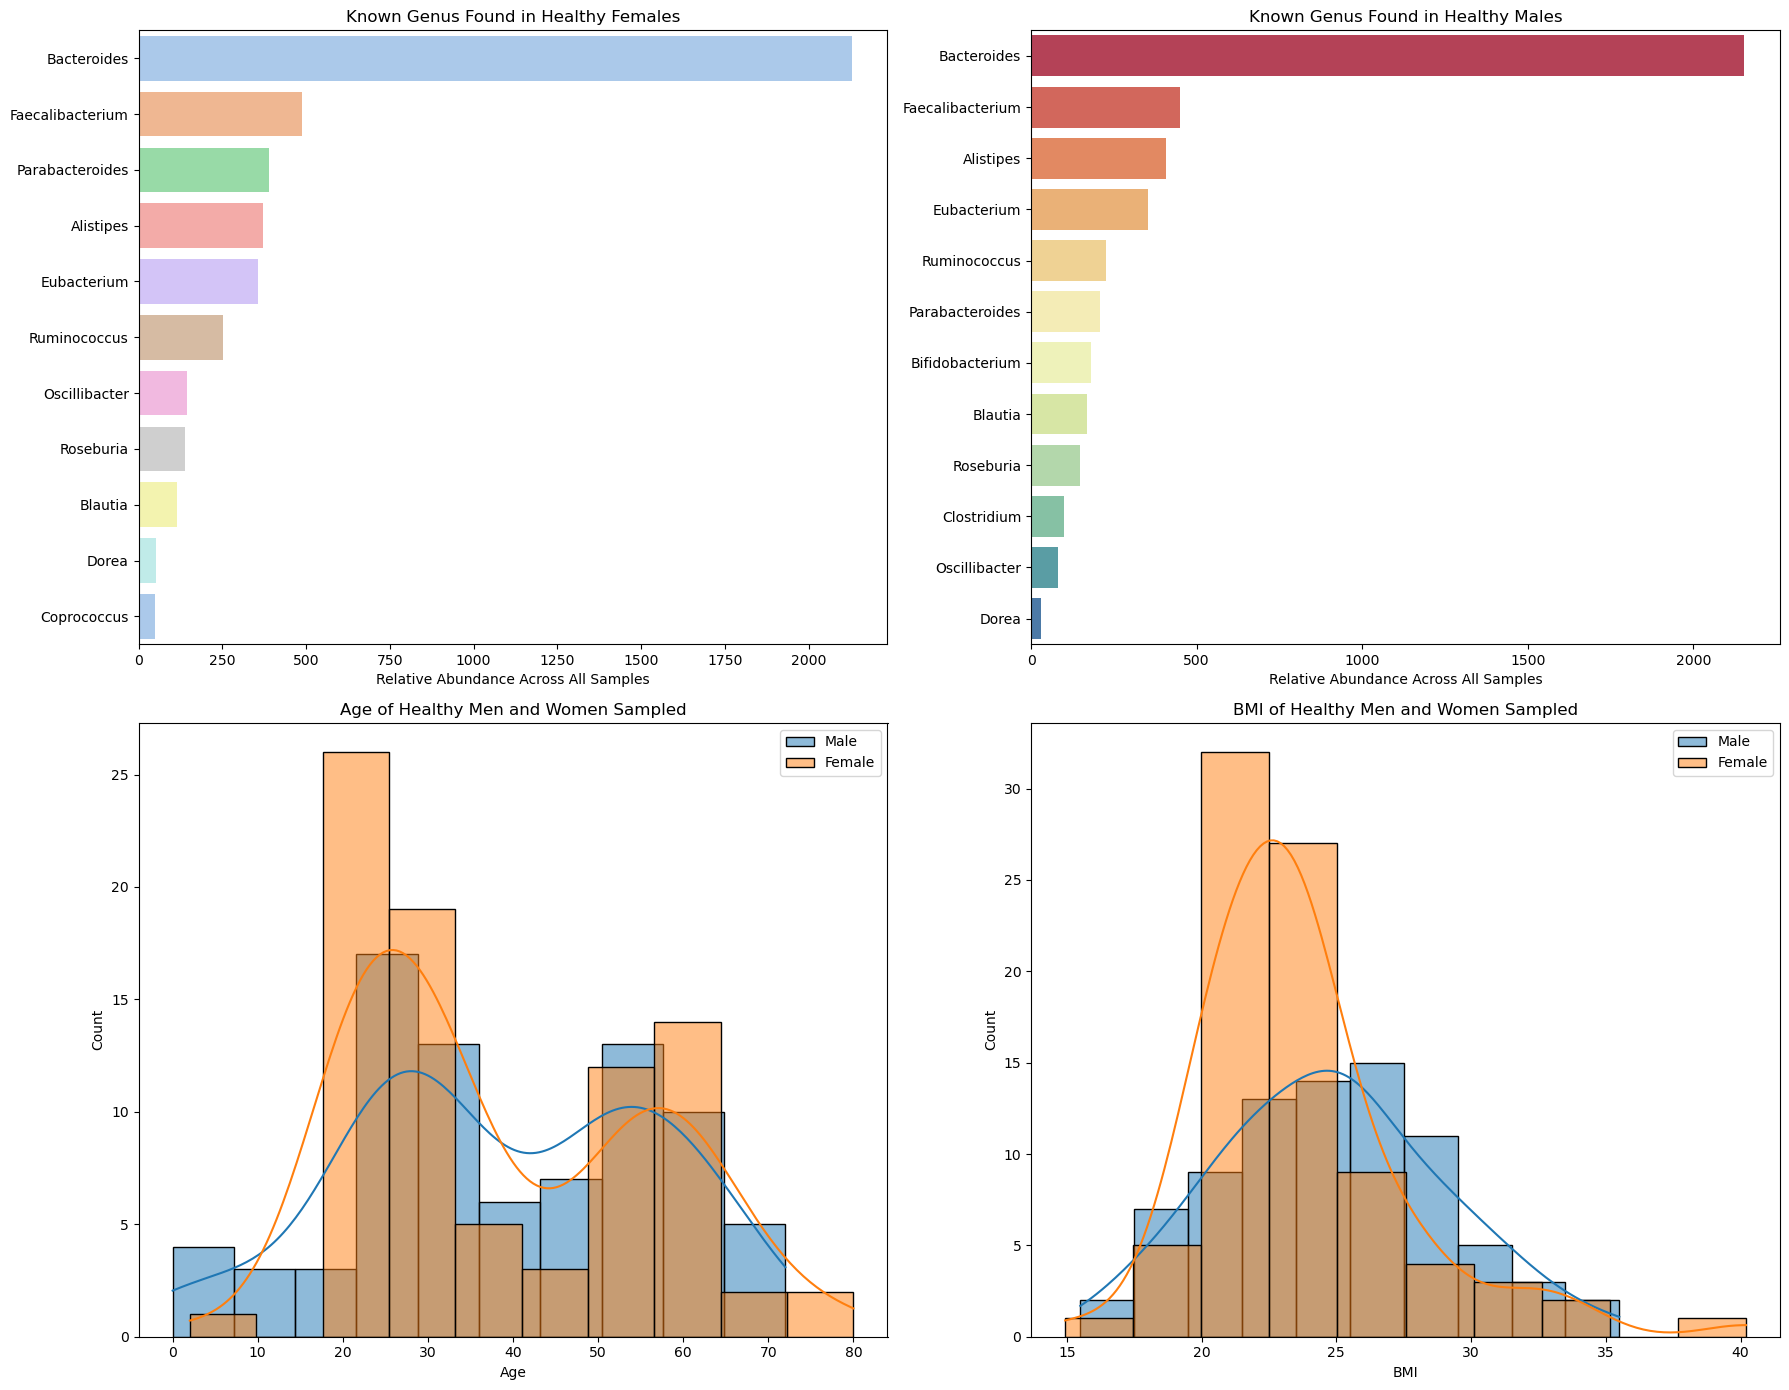

In [224]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sns.barplot(summ_t_sorted_bacteria_health_female, orient='h', palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title('Known Genus Found in Healthy Females')
axes[0, 0].set_xlabel('Relative Abundance Across All Samples')

sns.barplot(summ_t_sorted_bacteria_health_male, orient='h', palette="Spectral", ax=axes[0, 1])
axes[0, 1].set_title('Known Genus Found in Healthy Males')
axes[0, 1].set_xlabel('Relative Abundance Across All Samples')

sns.histplot(health_male_df['Age'], bins=10, kde=True, label='Male', ax=axes[1, 0])
sns.histplot(health_female_df['Age'], bins=10, kde=True, label='Female', ax=axes[1, 0])
axes[1, 0].set_title('Age of Healthy Men and Women Sampled')
axes[1, 0].legend()

sns.histplot(health_male_df['BMI'], bins=10, kde=True, label='Male', ax=axes[1, 1])
sns.histplot(health_female_df['BMI'], bins=10, kde=True, label='Female', ax=axes[1, 1])
axes[1, 1].set_title('BMI of Healthy Men and Women Sampled')
axes[1, 1].legend()

plt.tight_layout()

plt.savefig('generic_healthy_graphs.jpg')

plt.show()

### Depression

In [340]:
dep_male_df = pd.read_csv('clean_depression_male_condition.csv')
dep_male_df = dep_male_df.loc[:, ~dep_male_df.columns.str.contains('^Unnamed')]
dep_male_df.head()

,Run ID,Sex,BMI,Age,Country,Condition,Akkermansia,Alistipes,Anaerofilum,Anaerotruncus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1072629,Male,17.67,64.0,United States of America,"Bipolar Disorder, Depression, Intestinal Disea...",2.158450,17.50470,0.033877,0.159706,...,1.408310,1.974540,11.494000,0.029037,0.024198,0.503315,1.456710,0.198422,0.004840,21.9813
1,ERR1072937,Male,26.51,53.0,United States of America,"Bipolar Disorder, Cardiovascular Diseases, Dep...",0.031791,1.01733,0.005299,0.105971,...,0.243734,0.927251,0.222540,0.052986,41.169900,0.090076,0.021194,0.111270,0.598739,10.1733
2,ERR1073491,Male,28.08,49.0,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.176768,5.60290,0.025253,0.126263,...,2.077020,0.656566,3.936240,0.022096,0.018939,0.407197,6.177400,0.085227,0.050505,11.0574
3,ERR1075554,Male,30.74,62.0,United States of America,"Attention Deficit Disorder with Hyperactivity,...",0.360811,3.15526,0.044181,0.191451,...,0.250359,2.032330,0.025772,0.147270,0.003682,1.395380,0.209860,0.224587,0.206178,25.9674
4,ERR1075686,Male,45.84,56.0,United States of America,"Bipolar Disorder, Depression, Lung Diseases, S...",0.037344,4.91069,0.012448,1.163880,...,0.485467,0.553930,1.350590,0.024896,1.674240,0.149374,1.275910,0.908695,0.037344,55.3059


In [341]:
dep_female_df = pd.read_csv('clean_depression_female_condition.csv')
dep_female_df = dep_female_df.loc[:, ~dep_female_df.columns.str.contains('^Unnamed')]
dep_female_df.head()

,Run ID,Sex,BMI,Age,Country,Condition,Akkermansia,Alistipes,Anaerotruncus,Bacillus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1073023,Female,34.72,35,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.005583,3.41670,0.904422,3.612100,...,0.022331,0.614113,3.818670,0.027914,0.005583,1.747430,1.574360,0.217731,0.206565,28.21010
1,ERR1073394,Female,22.41,27,United States of America,"Autoimmune Diseases, Bipolar Disorder, Depress...",0.005104,6.11698,0.053591,0.030623,...,0.604808,1.253000,1.819530,0.117389,0.005104,1.436740,0.247537,0.010208,0.010208,3.81514
2,ERR1073395,Female,22.41,27,United States of America,"Autoimmune Diseases, Bipolar Disorder, Depress...",0.002470,6.74687,0.069173,0.027175,...,0.140817,1.339000,1.647810,0.027175,0.012352,2.030730,0.303869,0.002470,0.019764,4.92366
3,ERR1073490,Female,25.73,37,United States of America,"Bipolar Disorder, Depression, Schizophrenia",0.331675,3.57188,0.290216,0.041459,...,0.424161,2.611940,2.092100,0.031892,0.328486,0.711188,0.373134,0.105243,0.054216,36.50660
4,ERR1073812,Female,29.71,55,United States of America,"Attention Deficit Disorder with Hyperactivity,...",0.005280,3.12022,0.068634,0.021118,...,0.211182,0.628267,0.950319,2.418040,0.047516,0.158387,0.021118,0.036957,0.047516,59.09930


In [216]:
dep_female_bacteria_df = dep_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], 
                                            axis=1)
summ_bacteria_dep_female = dep_female_bacteria_df.sum(axis=0)
summ_t_bacteria_dep_female = pd.DataFrame(summ_bacteria_dep_female).T

sorted_indices_bact_dep_female = np.argsort(summ_t_bacteria_dep_female.values.flatten())[::-1]

summ_t_sorted_bacteria_dep_female = summ_t_bacteria_dep_female.iloc[0, sorted_indices_bact_dep_female]
#print(summ_t_sorted_bacteria_dep_female)

dep_male_bacteria_df = dep_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)

summ_bacteria_dep_male = dep_male_bacteria_df.sum(axis=0)
summ_t_bacteria_dep_male = pd.DataFrame(summ_bacteria_dep_male).T

sorted_indices_bact_dep_male = np.argsort(summ_t_bacteria_dep_male.values.flatten())[::-1]

summ_t_sorted_bacteria_dep_male = summ_t_bacteria_dep_male.iloc[0, sorted_indices_bact_dep_male]
#print(summ_t_sorted_bacteria_dep_male)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/3066745922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_dep_female, orient='h', palette="pastel", ax=axes[0, 0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/3066745922.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summ_t_sorted_bacteria_dep_male, orient='h', palette="Spectral", ax=axes[0, 1])


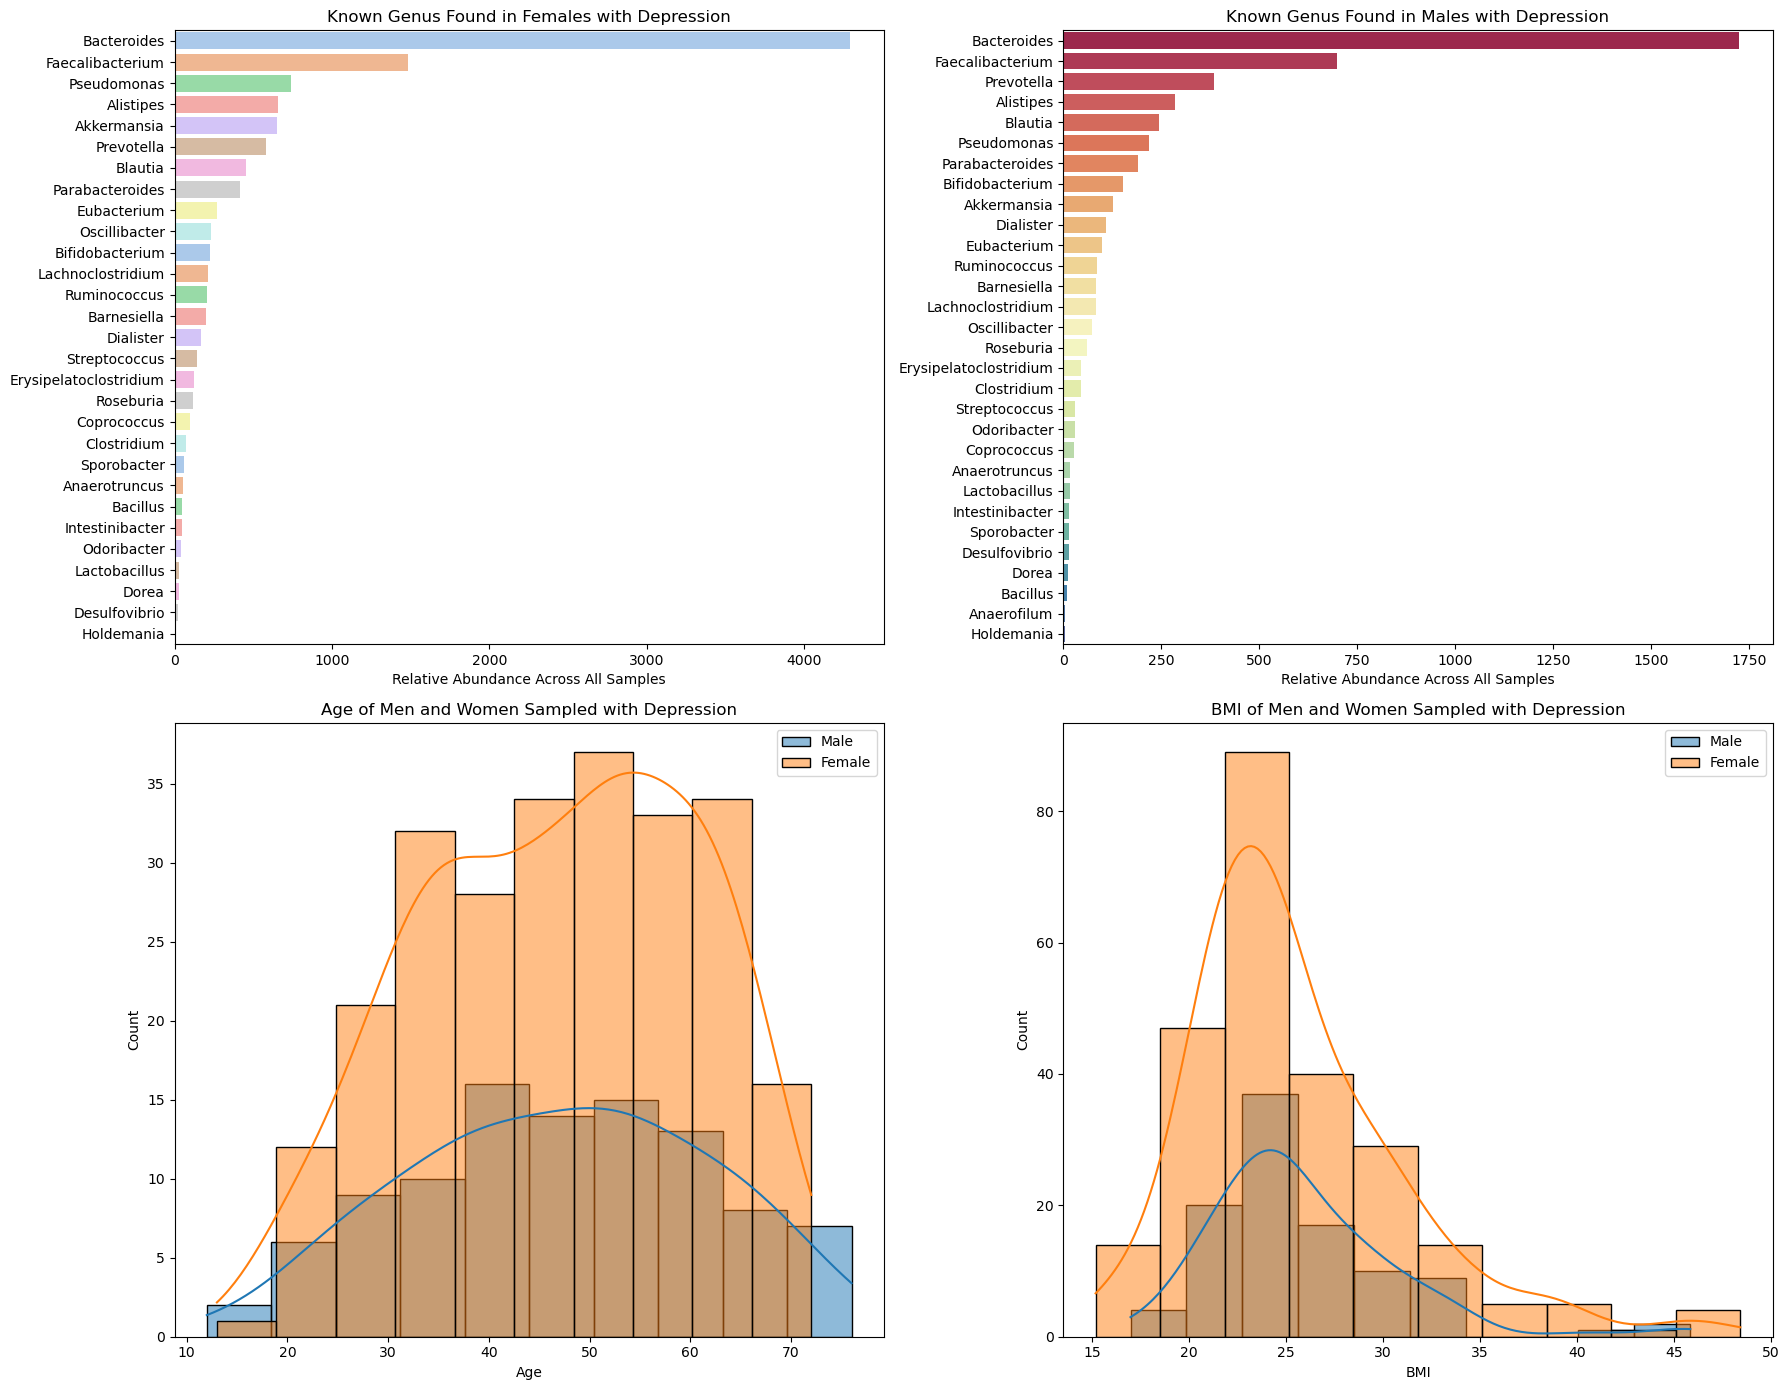

In [310]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sns.barplot(summ_t_sorted_bacteria_dep_female, orient='h', palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title('Known Genus Found in Females with Depression')
axes[0, 0].set_xlabel('Relative Abundance Across All Samples')

sns.barplot(summ_t_sorted_bacteria_dep_male, orient='h', palette="Spectral", ax=axes[0, 1])
axes[0, 1].set_title('Known Genus Found in Males with Depression')
axes[0, 1].set_xlabel('Relative Abundance Across All Samples')

sns.histplot(dep_male_df['Age'], bins=10, kde=True, label='Male', ax=axes[1, 0])
sns.histplot(dep_female_df['Age'], bins=10, kde=True, label='Female', ax=axes[1, 0])
axes[1, 0].set_title('Age of Men and Women Sampled with Depression')
axes[1, 0].legend()

sns.histplot(dep_male_df['BMI'], bins=10, kde=True, label='Male', ax=axes[1, 1])
sns.histplot(dep_female_df['BMI'], bins=10, kde=True, label='Female', ax=axes[1, 1])
axes[1, 1].set_title('BMI of Men and Women Sampled with Depression')
axes[1, 1].legend()

plt.tight_layout()

plt.savefig('generic_depression_graphs.jpg')

plt.show()

# Condition-Related

In [287]:
conditions_ep_male = ep_male_df['Condition'].tolist()
conditions_ep_male

['Epilepsy',
 'Constipation, Epilepsy, Lung Diseases, Thyroid Diseases',
 'Epilepsy',
 'Epilepsy',
 'Epilepsy',
 'Diarrhea, Epilepsy, Migrane Disorders',
 'Autoimmune Diseases, Cardiovascular Diseases, Constipation, Epilepsy, Intestinal Diseases, Migrane Disorders',
 'Autism Spectrum Disorder, Epilepsy',
 'Autism Spectrum Disorder, Epilepsy',
 'Epilepsy, Lung Diseases',
 'Constipation, Epilepsy, Lung Diseases',
 'Attention Deficit Disorder with Hyperactivity, Epilepsy',
 'Autism Spectrum Disorder, Epilepsy',
 'Epilepsy, Liver Diseases',
 'Epilepsy, Lung Diseases',
 'Epilepsy, Kidney Diseases, Lung Diseases',
 'Cardiovascular Diseases, Epilepsy',
 'Autism Spectrum Disorder, Attention Deficit Disorder with Hyperactivity, Bipolar Disorder, Clostridium Infections, Constipation, Depression, Epilepsy, Intestinal Diseases, Schizophrenia',
 'Autism Spectrum Disorder, Autoimmune Diseases, Constipation, Epilepsy, Irritable Bowel Syndrome',
 'Epilepsy',
 'Epilepsy',
 'Epilepsy']

In [289]:
constipation_count = 0
lung_diseases_count = 0
thyroid_diseases_count = 0
diarrhea_count = 0
migrane_disorders_count = 0
autoimmune_diseases_count = 0
cardiovascular_diseases_count = 0
intestinal_diseases_count = 0
autism_count = 0
adhd_count = 0
kidney_diseases_count = 0
liver_diseases_count = 0
bipolar_count = 0
colitis_count = 0
depression_count = 0
schizophrenia_count = 0
ibs_count = 0
diabetes_count = 0
celiac_count = 0
phenyl_count = 0

for entry in conditions_ep_male:
    if 'Constipation' in entry:
        constipation_count += 1
    if 'Lung Diseases' in entry:
        lung_diseases_count += 1
    if 'Thyroid Diseases' in entry:
        thyroid_diseases_count += 1
    if 'Diarrhea' in entry:
        diarrhea_count += 1
    if 'Migrane Disorders' in entry:
        migrane_disorders_count += 1
    if 'Autoimmune Diseases' in entry:
        autoimmune_diseases_count += 1
    if 'Cardiovascular Diseases' in entry:
        cardiovascular_diseases_count += 1
    if 'Intestinal Diseases' in entry:
        intestinal_diseases_count += 1
    if 'Autism Spectrum Disorder' in entry:
        autism_count += 1
    if 'Attention Deficit Disorder with Hyperactivity' in entry:
        adhd_count += 1
    if 'Kidney Diseases' in entry:
        kidney_diseases_count += 1
    if 'Liver Diseases' in entry:
        liver_diseases_count += 1
    if 'Bipolar Disorder' in entry:
        bipolar_count += 1
    if 'Clostridium Infections' in entry:
        colitis_count += 1
    if 'Depression' in entry:
        depression_count += 1
    if 'Schizophrenia' in entry:
        schizophrenia_count += 1
    if 'Irritable Bowel Syndrome' in entry:
        ibs_count += 1
    if 'Diabetes Mellitus' in entry:
        diabetes_count += 1
    if 'Celiac Disease' in entry:
        celiac_count += 1
    if 'Phenylketonurias' in entry:
        phenyl_count += 1


data = {
    'Constipation': constipation_count,
    'Lung Diseases': lung_diseases_count,
    'Thyroid Diseases': thyroid_diseases_count,
    'Diarrhea': diarrhea_count,
    'Migrane Disorders': migrane_disorders_count,
    'Autoimmune Diseases': autoimmune_diseases_count,
    'Cardiovascular Diseases': cardiovascular_diseases_count,
    'Intestinal Diseases': intestinal_diseases_count,
    'Autism Spectrum Disorder': autism_count,
    'Attention Deficit Disorder with Hyperactivity': adhd_count,
    'Kidney Diseases': kidney_diseases_count,
    'Liver Diseases': liver_diseases_count,
    'Bipolar Disorder': bipolar_count,
    'Clostridium Infections': colitis_count,
    'Depression': depression_count,
    'Schizophrenia': schizophrenia_count,
    'Irritable Bowel Syndrome': ibs_count,
    'Diabetes Mellitus': diabetes_count,
    'Celiac Disease': celiac_count,
    'Phenylketonurias': phenyl_count
}

ep_condition_male_count_df = pd.DataFrame(list(data.items()), columns=['Condition', 'Count'])

sorted_indices_ep_male = np.argsort(ep_condition_male_count_df['Count'])[::-1] 
ep_condition_male_count_df_sorted = ep_condition_male_count_df.iloc[sorted_indices_ep_male]
ep_condition_male_count_df_sorted

,Condition,Count
0,Constipation,5
8,Autism Spectrum Disorder,5
1,Lung Diseases,5
4,Migrane Disorders,2
5,Autoimmune Diseases,2
6,Cardiovascular Diseases,2
7,Intestinal Diseases,2
9,Attention Deficit Disorder with Hyperactivity,2
11,Liver Diseases,1
10,Kidney Diseases,1


In [290]:
conditions_ep_female = ep_female_df['Condition'].tolist()
conditions_ep_female

['Attention Deficit Disorder with Hyperactivity, Bipolar Disorder, Clostridium Infections, Depression, Diabetes Mellitus, Epilepsy, Intestinal Diseases, Lung Diseases, Schizophrenia',
 'Autoimmune Diseases, Bipolar Disorder, Constipation, Depression, Epilepsy, Lung Diseases, Schizophrenia, Thyroid Diseases',
 'Autoimmune Diseases, Diabetes Mellitus, Epilepsy, Thyroid Diseases',
 'Attention Deficit Disorder with Hyperactivity, Autoimmune Diseases, Bipolar Disorder, Cardiovascular Diseases, Constipation, Depression, Epilepsy, Intestinal Diseases, Intestinal Diseases, Schizophrenia, Irritable Bowel Syndrome',
 'Bipolar Disorder, Constipation, Depression, Epilepsy, Lung Diseases, Schizophrenia',
 'Autoimmune Diseases, Epilepsy, Migrane Disorders, Thyroid Diseases',
 'Autoimmune Diseases, Bipolar Disorder, Celiac Disease, Depression, Epilepsy, Lung Diseases, Schizophrenia, Thyroid Diseases, Irritable Bowel Syndrome',
 'Autoimmune Diseases, Constipation, Epilepsy, Intestinal Diseases, Thyroi

In [291]:
constipation1_count = 0
lung_diseases1_count = 0
thyroid_diseases1_count = 0
diarrhea1_count = 0
migrane_disorders1_count = 0
autoimmune_diseases1_count = 0
cardiovascular_diseases1_count = 0
intestinal_diseases1_count = 0
autism1_count = 0
adhd1_count = 0
kidney_diseases1_count = 0
liver_diseases1_count = 0
bipolar1_count = 0
colitis1_count = 0
depression1_count = 0
schizophrenia1_count = 0
ibs1_count = 0
diabetes1_count = 0
celiac1_count = 0
phenyl1_count = 0

for entry in conditions_ep_female:
    if 'Constipation' in entry:
        constipation1_count += 1
    if 'Lung Diseases' in entry:
        lung_diseases1_count += 1
    if 'Thyroid Diseases' in entry:
        thyroid_diseases1_count += 1
    if 'Diarrhea' in entry:
        diarrhea1_count += 1
    if 'Migrane Disorders' in entry:
        migrane_disorders1_count += 1
    if 'Autoimmune Diseases' in entry:
        autoimmune_diseases1_count += 1
    if 'Cardiovascular Diseases' in entry:
        cardiovascular_diseases1_count += 1
    if 'Intestinal Diseases' in entry:
        intestinal_diseases1_count += 1
    if 'Autism Spectrum Disorder' in entry:
        autism1_count += 1
    if 'Attention Deficit Disorder with Hyperactivity' in entry:
        adhd1_count += 1
    if 'Kidney Diseases' in entry:
        kidney_diseases1_count += 1
    if 'Liver Diseases' in entry:
        liver_diseases1_count += 1
    if 'Bipolar Disorder' in entry:
        bipolar1_count += 1
    if 'Clostridium Infections' in entry:
        colitis1_count += 1
    if 'Depression' in entry:
        depression1_count += 1
    if 'Schizophrenia' in entry:
        schizophrenia1_count += 1
    if 'Irritable Bowel Syndrome' in entry:
        ibs1_count += 1
    if 'Diabetes Mellitus' in entry:
        diabetes1_count += 1
    if 'Celiac Disease' in entry:
        celiac1_count += 1
    if 'Phenylketonurias' in entry:
        phenyl1_count += 1


data1 = {
    'Constipation': constipation1_count,
    'Lung Diseases': lung_diseases1_count,
    'Thyroid Diseases': thyroid_diseases1_count,
    'Diarrhea': diarrhea1_count,
    'Migrane Disorders': migrane_disorders1_count,
    'Autoimmune Diseases': autoimmune_diseases1_count,
    'Cardiovascular Diseases': cardiovascular_diseases1_count,
    'Intestinal Diseases': intestinal_diseases1_count,
    'Autism Spectrum Disorder': autism1_count,
    'Attention Deficit Disorder with Hyperactivity': adhd1_count,
    'Kidney Diseases': kidney_diseases1_count,
    'Liver Diseases': liver_diseases1_count,
    'Bipolar Disorder': bipolar1_count,
    'Clostridium Infections': colitis1_count,
    'Depression': depression1_count,
    'Schizophrenia': schizophrenia1_count,
    'Irritable Bowel Syndrome': ibs1_count,
    'Diabetes Mellitus': diabetes1_count,
    'Celiac Disease': celiac1_count,
    'Phenylketonurias': phenyl1_count
}

ep_condition_female_count_df = pd.DataFrame(list(data1.items()), columns=['Condition', 'Count'])

sorted_indices_ep_female = np.argsort(ep_condition_female_count_df['Count'])[::-1] 
ep_condition_female_count_df_sorted = ep_condition_female_count_df.iloc[sorted_indices_ep_female]
ep_condition_female_count_df_sorted

,Condition,Count
0,Constipation,7
5,Autoimmune Diseases,7
15,Schizophrenia,6
14,Depression,6
2,Thyroid Diseases,6
12,Bipolar Disorder,6
7,Intestinal Diseases,5
1,Lung Diseases,5
16,Irritable Bowel Syndrome,5
4,Migrane Disorders,5


/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/2247043250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Condition', data=ep_condition_male_count_df_sorted, palette='Spectral', ax=axes[0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/2247043250.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Condition', data=ep_condition_female_count_df_sorted, palette='pastel', ax=axes[1])


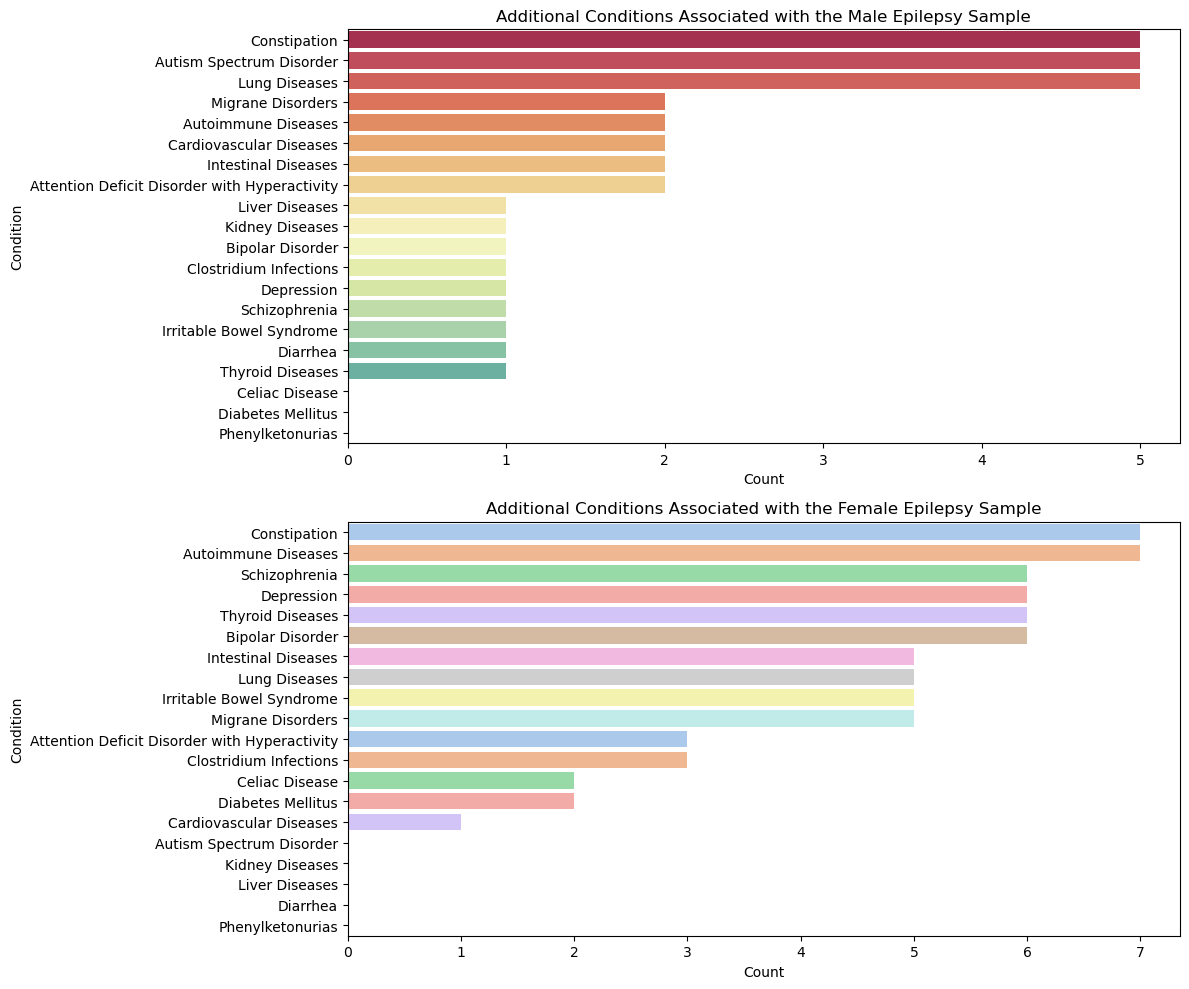

In [293]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10)) 

sns.barplot(x='Count', y='Condition', data=ep_condition_male_count_df_sorted, palette='Spectral', ax=axes[0])
axes[0].set_title('Additional Conditions Associated with the Male Epilepsy Sample')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Condition')

sns.barplot(x='Count', y='Condition', data=ep_condition_female_count_df_sorted, palette='pastel', ax=axes[1])
axes[1].set_title('Additional Conditions Associated with the Female Epilepsy Sample')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Condition')

plt.tight_layout()

plt.savefig('epilepsy_associated_conditions_count.jpg')

plt.show()

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/4066877048.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Condition', data=sch_condition_male_count_df_sorted, palette='Spectral', ax=axes[0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/4066877048.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Condition', data=sch_condition_female_count_df_sorted, palette='pastel', ax=axes[1])


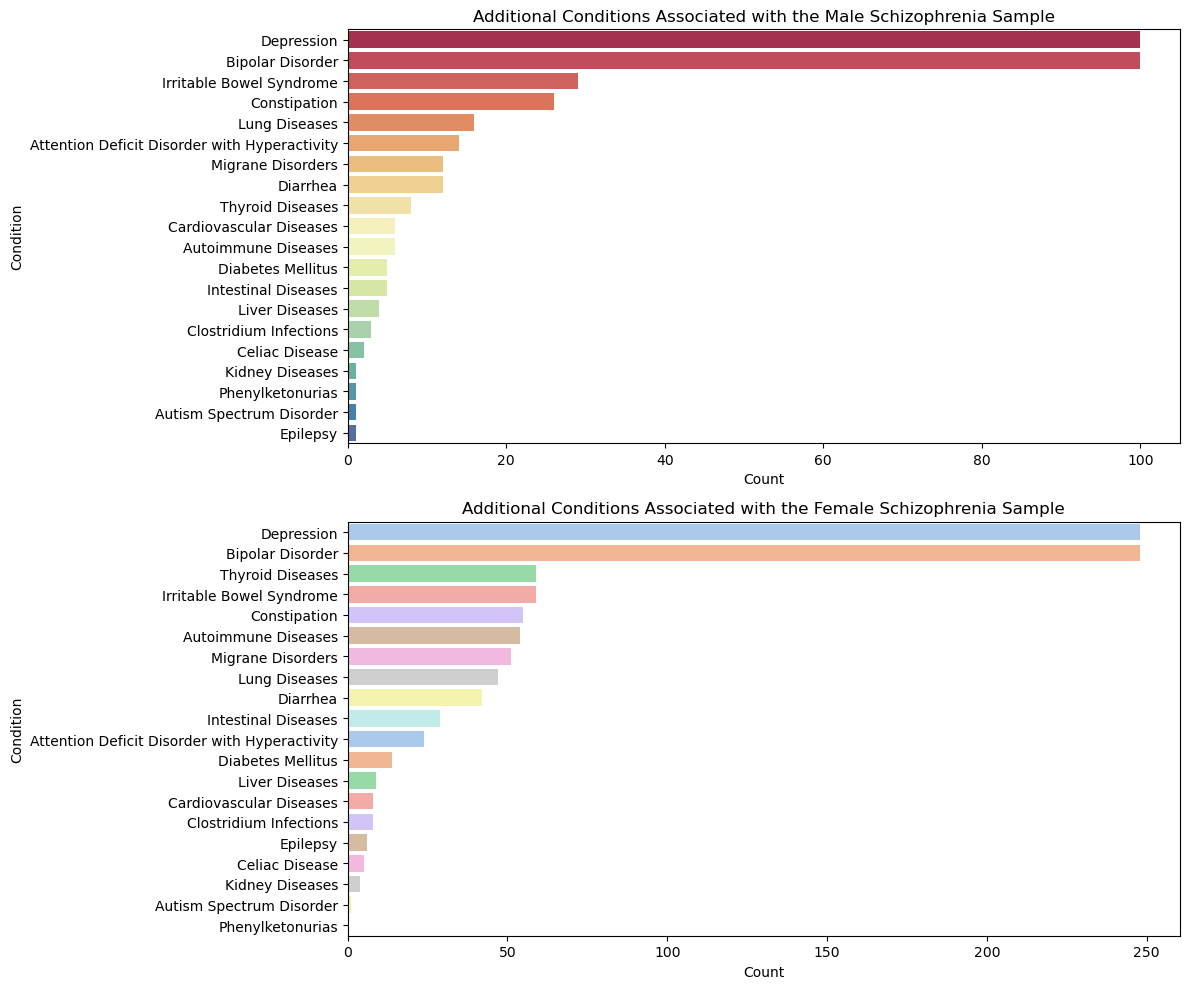

In [302]:
conditions_sch_male = sch_male_df['Condition'].tolist()

constipation_count = 0
lung_diseases_count = 0
thyroid_diseases_count = 0
diarrhea_count = 0
migrane_disorders_count = 0
autoimmune_diseases_count = 0
cardiovascular_diseases_count = 0
intestinal_diseases_count = 0
autism_count = 0
adhd_count = 0
kidney_diseases_count = 0
liver_diseases_count = 0
bipolar_count = 0
colitis_count = 0
depression_count = 0
#schizophrenia_count = 0
ibs_count = 0
diabetes_count = 0
celiac_count = 0
phenyl_count = 0
epilepsy_count = 0

for entry in conditions_sch_male:
    if 'Constipation' in entry:
        constipation_count += 1
    if 'Lung Diseases' in entry:
        lung_diseases_count += 1
    if 'Thyroid Diseases' in entry:
        thyroid_diseases_count += 1
    if 'Diarrhea' in entry:
        diarrhea_count += 1
    if 'Migrane Disorders' in entry:
        migrane_disorders_count += 1
    if 'Autoimmune Diseases' in entry:
        autoimmune_diseases_count += 1
    if 'Cardiovascular Diseases' in entry:
        cardiovascular_diseases_count += 1
    if 'Intestinal Diseases' in entry:
        intestinal_diseases_count += 1
    if 'Autism Spectrum Disorder' in entry:
        autism_count += 1
    if 'Attention Deficit Disorder with Hyperactivity' in entry:
        adhd_count += 1
    if 'Kidney Diseases' in entry:
        kidney_diseases_count += 1
    if 'Liver Diseases' in entry:
        liver_diseases_count += 1
    if 'Bipolar Disorder' in entry:
        bipolar_count += 1
    if 'Clostridium Infections' in entry:
        colitis_count += 1
    if 'Depression' in entry:
        depression_count += 1
    #if 'Schizophrenia' in entry:
    #    schizophrenia_count += 1
    if 'Irritable Bowel Syndrome' in entry:
        ibs_count += 1
    if 'Diabetes Mellitus' in entry:
        diabetes_count += 1
    if 'Celiac Disease' in entry:
        celiac_count += 1
    if 'Phenylketonurias' in entry:
        phenyl_count += 1
    if 'Epilepsy' in entry:
        epilepsy_count += 1


data = {
    'Constipation': constipation_count,
    'Lung Diseases': lung_diseases_count,
    'Thyroid Diseases': thyroid_diseases_count,
    'Diarrhea': diarrhea_count,
    'Migrane Disorders': migrane_disorders_count,
    'Autoimmune Diseases': autoimmune_diseases_count,
    'Cardiovascular Diseases': cardiovascular_diseases_count,
    'Intestinal Diseases': intestinal_diseases_count,
    'Autism Spectrum Disorder': autism_count,
    'Attention Deficit Disorder with Hyperactivity': adhd_count,
    'Kidney Diseases': kidney_diseases_count,
    'Liver Diseases': liver_diseases_count,
    'Bipolar Disorder': bipolar_count,
    'Clostridium Infections': colitis_count,
    'Depression': depression_count,
    #'Schizophrenia': schizophrenia_count,
    'Irritable Bowel Syndrome': ibs_count,
    'Diabetes Mellitus': diabetes_count,
    'Celiac Disease': celiac_count,
    'Phenylketonurias': phenyl_count,
    'Epilepsy': epilepsy_count
}

sch_condition_male_count_df = pd.DataFrame(list(data.items()), columns=['Condition', 'Count'])

sorted_indices_sch_male = np.argsort(sch_condition_male_count_df['Count'])[::-1] 
sch_condition_male_count_df_sorted = sch_condition_male_count_df.iloc[sorted_indices_sch_male]
#sch_condition_male_count_df_sorted

conditions_sch_female = sch_female_df['Condition'].tolist()

constipation_count = 0
lung_diseases_count = 0
thyroid_diseases_count = 0
diarrhea_count = 0
migrane_disorders_count = 0
autoimmune_diseases_count = 0
cardiovascular_diseases_count = 0
intestinal_diseases_count = 0
autism_count = 0
adhd_count = 0
kidney_diseases_count = 0
liver_diseases_count = 0
bipolar_count = 0
colitis_count = 0
depression_count = 0
schizophrenia_count = 0
ibs_count = 0
diabetes_count = 0
celiac_count = 0
phenyl_count = 0
epilepsy_count = 0

for entry in conditions_sch_female:
    if 'Constipation' in entry:
        constipation_count += 1
    if 'Lung Diseases' in entry:
        lung_diseases_count += 1
    if 'Thyroid Diseases' in entry:
        thyroid_diseases_count += 1
    if 'Diarrhea' in entry:
        diarrhea_count += 1
    if 'Migrane Disorders' in entry:
        migrane_disorders_count += 1
    if 'Autoimmune Diseases' in entry:
        autoimmune_diseases_count += 1
    if 'Cardiovascular Diseases' in entry:
        cardiovascular_diseases_count += 1
    if 'Intestinal Diseases' in entry:
        intestinal_diseases_count += 1
    if 'Autism Spectrum Disorder' in entry:
        autism_count += 1
    if 'Attention Deficit Disorder with Hyperactivity' in entry:
        adhd_count += 1
    if 'Kidney Diseases' in entry:
        kidney_diseases_count += 1
    if 'Liver Diseases' in entry:
        liver_diseases_count += 1
    if 'Bipolar Disorder' in entry:
        bipolar_count += 1
    if 'Clostridium Infections' in entry:
        colitis_count += 1
    if 'Depression' in entry:
        depression_count += 1
    if 'Schizophrenia' in entry:
        schizophrenia_count += 1
    if 'Irritable Bowel Syndrome' in entry:
        ibs_count += 1
    if 'Diabetes Mellitus' in entry:
        diabetes_count += 1
    if 'Celiac Disease' in entry:
        celiac_count += 1
    if 'Phenylketonurias' in entry:
        phenyl_count += 1
    if 'Epilepsy' in entry:
        epilepsy_count += 1


data = {
    'Constipation': constipation_count,
    'Lung Diseases': lung_diseases_count,
    'Thyroid Diseases': thyroid_diseases_count,
    'Diarrhea': diarrhea_count,
    'Migrane Disorders': migrane_disorders_count,
    'Autoimmune Diseases': autoimmune_diseases_count,
    'Cardiovascular Diseases': cardiovascular_diseases_count,
    'Intestinal Diseases': intestinal_diseases_count,
    'Autism Spectrum Disorder': autism_count,
    'Attention Deficit Disorder with Hyperactivity': adhd_count,
    'Kidney Diseases': kidney_diseases_count,
    'Liver Diseases': liver_diseases_count,
    'Bipolar Disorder': bipolar_count,
    'Clostridium Infections': colitis_count,
    'Depression': depression_count,
    #'Schizophrenia': schizophrenia_count,
    'Irritable Bowel Syndrome': ibs_count,
    'Diabetes Mellitus': diabetes_count,
    'Celiac Disease': celiac_count,
    'Phenylketonurias': phenyl_count,
    'Epilepsy': epilepsy_count
}

sch_condition_female_count_df = pd.DataFrame(list(data.items()), columns=['Condition', 'Count'])

sorted_indices_sch_female = np.argsort(sch_condition_female_count_df['Count'])[::-1] 
sch_condition_female_count_df_sorted = sch_condition_female_count_df.iloc[sorted_indices_sch_female]
#sch_condition_female_count_df_sorted

fig, axes = plt.subplots(2, 1, figsize=(12, 10)) 

sns.barplot(x='Count', y='Condition', data=sch_condition_male_count_df_sorted, palette='Spectral', ax=axes[0])
axes[0].set_title('Additional Conditions Associated with the Male Schizophrenia Sample')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Condition')

sns.barplot(x='Count', y='Condition', data=sch_condition_female_count_df_sorted, palette='pastel', ax=axes[1])
axes[1].set_title('Additional Conditions Associated with the Female Schizophrenia Sample')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Condition')

plt.tight_layout()

plt.savefig('schizophrenia_associated_conditions_count.jpg')

plt.show()

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/28853811.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Condition', data=bi_condition_male_count_df_sorted, palette='Spectral', ax=axes[0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/28853811.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Condition', data=bi_condition_female_count_df_sorted, palette='pastel', ax=axes[1])


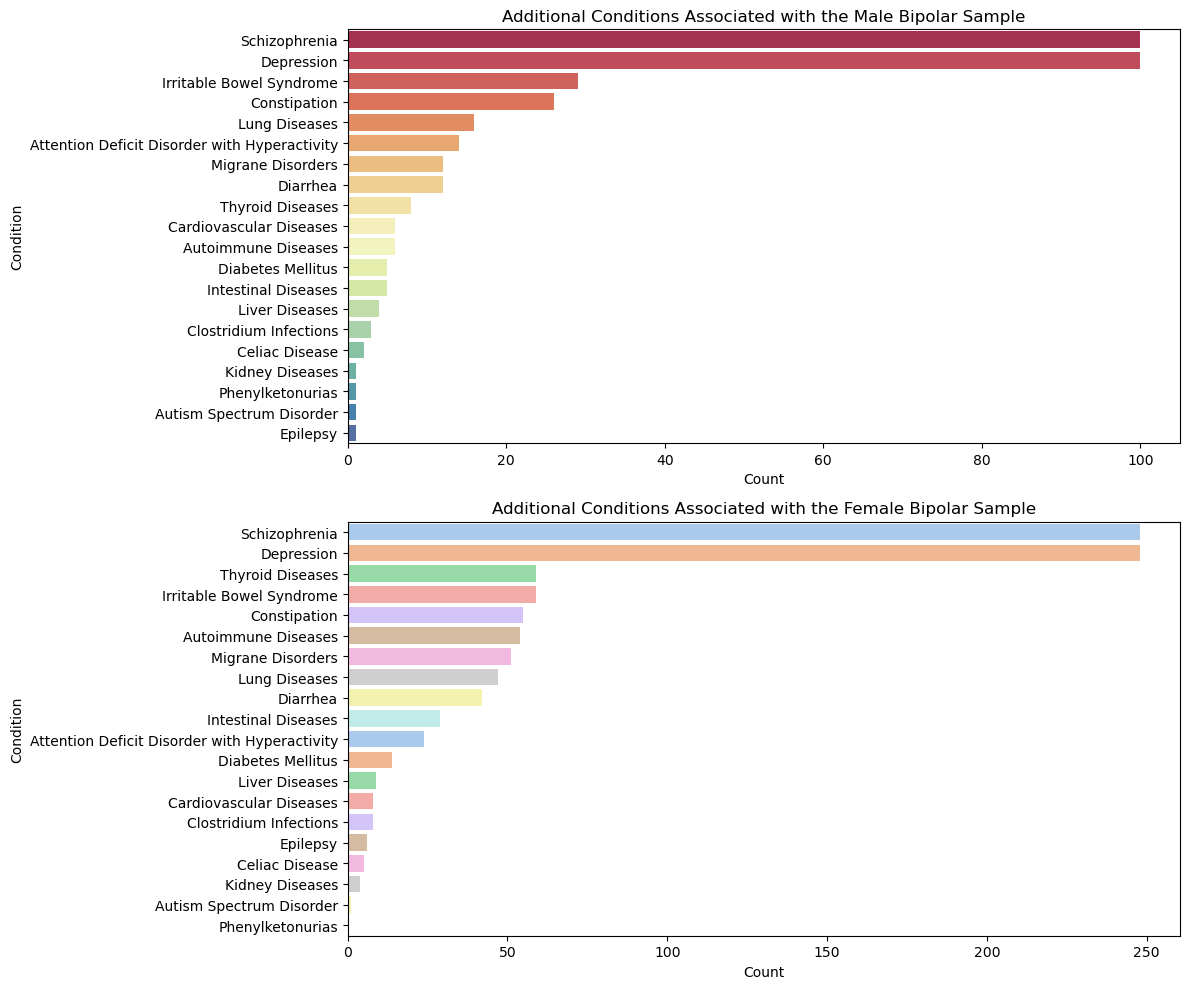

In [306]:
conditions_bi_male = bi_male_df['Condition'].tolist()
conditions_bi_female = bi_female_df['Condition'].tolist()

constipation_count = 0
lung_diseases_count = 0
thyroid_diseases_count = 0
diarrhea_count = 0
migrane_disorders_count = 0
autoimmune_diseases_count = 0
cardiovascular_diseases_count = 0
intestinal_diseases_count = 0
autism_count = 0
adhd_count = 0
kidney_diseases_count = 0
liver_diseases_count = 0
#bipolar_count = 0
colitis_count = 0
depression_count = 0
schizophrenia_count = 0
ibs_count = 0
diabetes_count = 0
celiac_count = 0
phenyl_count = 0
epilepsy_count = 0

for entry in conditions_bi_male:
    if 'Constipation' in entry:
        constipation_count += 1
    if 'Lung Diseases' in entry:
        lung_diseases_count += 1
    if 'Thyroid Diseases' in entry:
        thyroid_diseases_count += 1
    if 'Diarrhea' in entry:
        diarrhea_count += 1
    if 'Migrane Disorders' in entry:
        migrane_disorders_count += 1
    if 'Autoimmune Diseases' in entry:
        autoimmune_diseases_count += 1
    if 'Cardiovascular Diseases' in entry:
        cardiovascular_diseases_count += 1
    if 'Intestinal Diseases' in entry:
        intestinal_diseases_count += 1
    if 'Autism Spectrum Disorder' in entry:
        autism_count += 1
    if 'Attention Deficit Disorder with Hyperactivity' in entry:
        adhd_count += 1
    if 'Kidney Diseases' in entry:
        kidney_diseases_count += 1
    if 'Liver Diseases' in entry:
        liver_diseases_count += 1
    #if 'Bipolar Disorder' in entry:
    #    bipolar_count += 1
    if 'Clostridium Infections' in entry:
        colitis_count += 1
    if 'Depression' in entry:
        depression_count += 1
    if 'Schizophrenia' in entry:
        schizophrenia_count += 1
    if 'Irritable Bowel Syndrome' in entry:
        ibs_count += 1
    if 'Diabetes Mellitus' in entry:
        diabetes_count += 1
    if 'Celiac Disease' in entry:
        celiac_count += 1
    if 'Phenylketonurias' in entry:
        phenyl_count += 1
    if 'Epilepsy' in entry:
        epilepsy_count += 1


data = {
    'Constipation': constipation_count,
    'Lung Diseases': lung_diseases_count,
    'Thyroid Diseases': thyroid_diseases_count,
    'Diarrhea': diarrhea_count,
    'Migrane Disorders': migrane_disorders_count,
    'Autoimmune Diseases': autoimmune_diseases_count,
    'Cardiovascular Diseases': cardiovascular_diseases_count,
    'Intestinal Diseases': intestinal_diseases_count,
    'Autism Spectrum Disorder': autism_count,
    'Attention Deficit Disorder with Hyperactivity': adhd_count,
    'Kidney Diseases': kidney_diseases_count,
    'Liver Diseases': liver_diseases_count,
    #'Bipolar Disorder': bipolar_count,
    'Clostridium Infections': colitis_count,
    'Depression': depression_count,
    'Schizophrenia': schizophrenia_count,
    'Irritable Bowel Syndrome': ibs_count,
    'Diabetes Mellitus': diabetes_count,
    'Celiac Disease': celiac_count,
    'Phenylketonurias': phenyl_count,
    'Epilepsy': epilepsy_count
}

bi_condition_male_count_df = pd.DataFrame(list(data.items()), columns=['Condition', 'Count'])

sorted_indices_bi_male = np.argsort(bi_condition_male_count_df['Count'])[::-1] 
bi_condition_male_count_df_sorted = bi_condition_male_count_df.iloc[sorted_indices_bi_male]
#sch_condition_male_count_df_sorted


constipation_count = 0
lung_diseases_count = 0
thyroid_diseases_count = 0
diarrhea_count = 0
migrane_disorders_count = 0
autoimmune_diseases_count = 0
cardiovascular_diseases_count = 0
intestinal_diseases_count = 0
autism_count = 0
adhd_count = 0
kidney_diseases_count = 0
liver_diseases_count = 0
#bipolar_count = 0
colitis_count = 0
depression_count = 0
schizophrenia_count = 0
ibs_count = 0
diabetes_count = 0
celiac_count = 0
phenyl_count = 0
epilepsy_count = 0

for entry in conditions_bi_female:
    if 'Constipation' in entry:
        constipation_count += 1
    if 'Lung Diseases' in entry:
        lung_diseases_count += 1
    if 'Thyroid Diseases' in entry:
        thyroid_diseases_count += 1
    if 'Diarrhea' in entry:
        diarrhea_count += 1
    if 'Migrane Disorders' in entry:
        migrane_disorders_count += 1
    if 'Autoimmune Diseases' in entry:
        autoimmune_diseases_count += 1
    if 'Cardiovascular Diseases' in entry:
        cardiovascular_diseases_count += 1
    if 'Intestinal Diseases' in entry:
        intestinal_diseases_count += 1
    if 'Autism Spectrum Disorder' in entry:
        autism_count += 1
    if 'Attention Deficit Disorder with Hyperactivity' in entry:
        adhd_count += 1
    if 'Kidney Diseases' in entry:
        kidney_diseases_count += 1
    if 'Liver Diseases' in entry:
        liver_diseases_count += 1
    #if 'Bipolar Disorder' in entry:
    #    bipolar_count += 1
    if 'Clostridium Infections' in entry:
        colitis_count += 1
    if 'Depression' in entry:
        depression_count += 1
    if 'Schizophrenia' in entry:
        schizophrenia_count += 1
    if 'Irritable Bowel Syndrome' in entry:
        ibs_count += 1
    if 'Diabetes Mellitus' in entry:
        diabetes_count += 1
    if 'Celiac Disease' in entry:
        celiac_count += 1
    if 'Phenylketonurias' in entry:
        phenyl_count += 1
    if 'Epilepsy' in entry:
        epilepsy_count += 1


data = {
    'Constipation': constipation_count,
    'Lung Diseases': lung_diseases_count,
    'Thyroid Diseases': thyroid_diseases_count,
    'Diarrhea': diarrhea_count,
    'Migrane Disorders': migrane_disorders_count,
    'Autoimmune Diseases': autoimmune_diseases_count,
    'Cardiovascular Diseases': cardiovascular_diseases_count,
    'Intestinal Diseases': intestinal_diseases_count,
    'Autism Spectrum Disorder': autism_count,
    'Attention Deficit Disorder with Hyperactivity': adhd_count,
    'Kidney Diseases': kidney_diseases_count,
    'Liver Diseases': liver_diseases_count,
    #'Bipolar Disorder': bipolar_count,
    'Clostridium Infections': colitis_count,
    'Depression': depression_count,
    'Schizophrenia': schizophrenia_count,
    'Irritable Bowel Syndrome': ibs_count,
    'Diabetes Mellitus': diabetes_count,
    'Celiac Disease': celiac_count,
    'Phenylketonurias': phenyl_count,
    'Epilepsy': epilepsy_count
}

bi_condition_female_count_df = pd.DataFrame(list(data.items()), columns=['Condition', 'Count'])

sorted_indices_bi_female = np.argsort(bi_condition_female_count_df['Count'])[::-1] 
bi_condition_female_count_df_sorted = bi_condition_female_count_df.iloc[sorted_indices_bi_female]
#sch_condition_female_count_df_sorted

fig, axes = plt.subplots(2, 1, figsize=(12, 10)) 

sns.barplot(x='Count', y='Condition', data=bi_condition_male_count_df_sorted, palette='Spectral', ax=axes[0])
axes[0].set_title('Additional Conditions Associated with the Male Bipolar Sample')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Condition')

sns.barplot(x='Count', y='Condition', data=bi_condition_female_count_df_sorted, palette='pastel', ax=axes[1])
axes[1].set_title('Additional Conditions Associated with the Female Bipolar Sample')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Condition')

plt.tight_layout()

plt.savefig('bipolar_associated_conditions_count.jpg')

plt.show()

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/4274810368.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Condition', data=dep_condition_male_count_df_sorted, palette='Spectral', ax=axes[0])
/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_46567/4274810368.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Condition', data=dep_condition_female_count_df_sorted, palette='pastel', ax=axes[1])


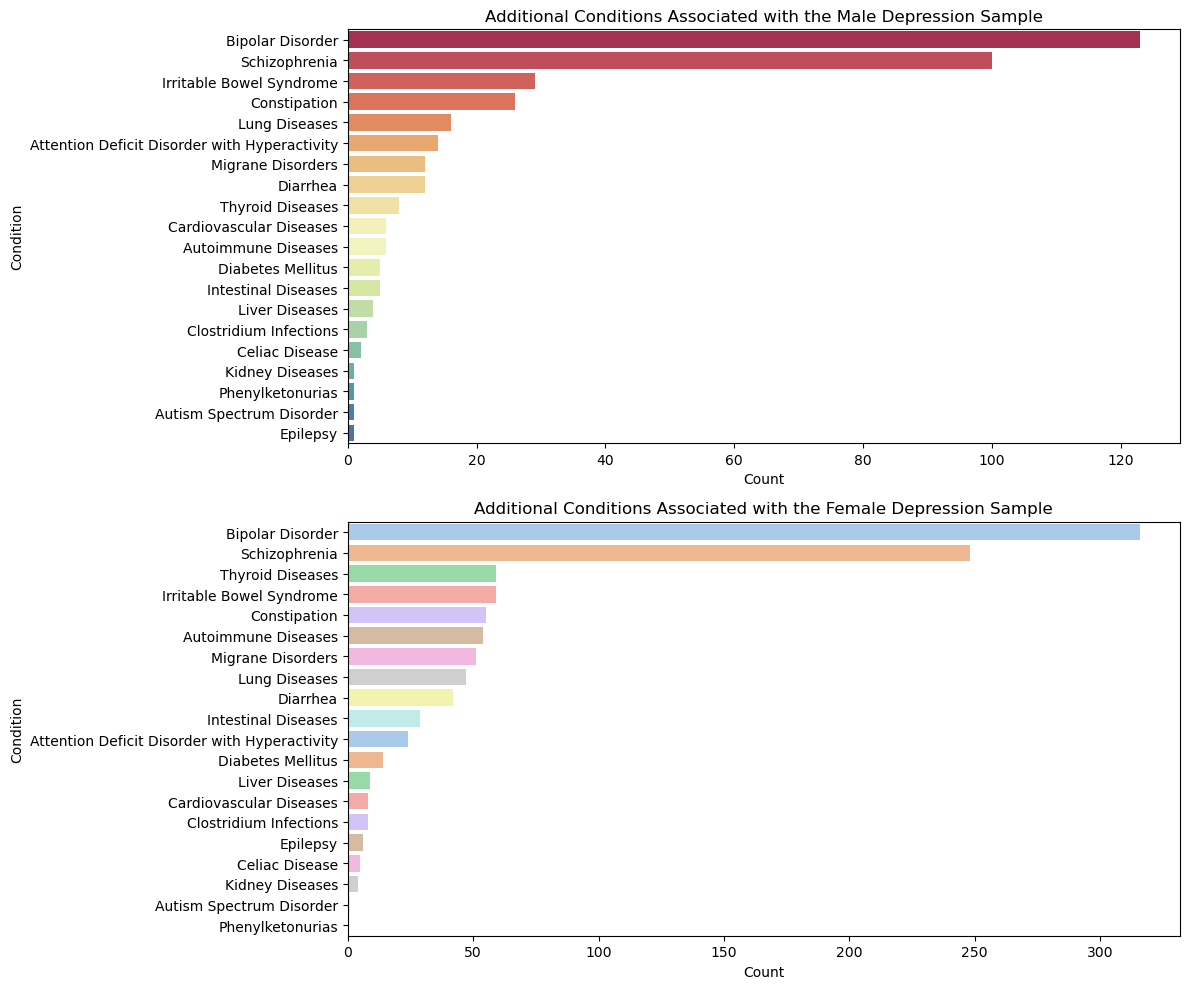

In [309]:
conditions_dep_male = dep_male_df['Condition'].tolist()
conditions_dep_female = dep_female_df['Condition'].tolist()

constipation_count = 0
lung_diseases_count = 0
thyroid_diseases_count = 0
diarrhea_count = 0
migrane_disorders_count = 0
autoimmune_diseases_count = 0
cardiovascular_diseases_count = 0
intestinal_diseases_count = 0
autism_count = 0
adhd_count = 0
kidney_diseases_count = 0
liver_diseases_count = 0
bipolar_count = 0
colitis_count = 0
#depression_count = 0
schizophrenia_count = 0
ibs_count = 0
diabetes_count = 0
celiac_count = 0
phenyl_count = 0
epilepsy_count = 0

for entry in conditions_bi_male:
    if 'Constipation' in entry:
        constipation_count += 1
    if 'Lung Diseases' in entry:
        lung_diseases_count += 1
    if 'Thyroid Diseases' in entry:
        thyroid_diseases_count += 1
    if 'Diarrhea' in entry:
        diarrhea_count += 1
    if 'Migrane Disorders' in entry:
        migrane_disorders_count += 1
    if 'Autoimmune Diseases' in entry:
        autoimmune_diseases_count += 1
    if 'Cardiovascular Diseases' in entry:
        cardiovascular_diseases_count += 1
    if 'Intestinal Diseases' in entry:
        intestinal_diseases_count += 1
    if 'Autism Spectrum Disorder' in entry:
        autism_count += 1
    if 'Attention Deficit Disorder with Hyperactivity' in entry:
        adhd_count += 1
    if 'Kidney Diseases' in entry:
        kidney_diseases_count += 1
    if 'Liver Diseases' in entry:
        liver_diseases_count += 1
    if 'Bipolar Disorder' in entry:
        bipolar_count += 1
    if 'Clostridium Infections' in entry:
        colitis_count += 1
    #if 'Depression' in entry:
    #    depression_count += 1
    if 'Schizophrenia' in entry:
        schizophrenia_count += 1
    if 'Irritable Bowel Syndrome' in entry:
        ibs_count += 1
    if 'Diabetes Mellitus' in entry:
        diabetes_count += 1
    if 'Celiac Disease' in entry:
        celiac_count += 1
    if 'Phenylketonurias' in entry:
        phenyl_count += 1
    if 'Epilepsy' in entry:
        epilepsy_count += 1


data = {
    'Constipation': constipation_count,
    'Lung Diseases': lung_diseases_count,
    'Thyroid Diseases': thyroid_diseases_count,
    'Diarrhea': diarrhea_count,
    'Migrane Disorders': migrane_disorders_count,
    'Autoimmune Diseases': autoimmune_diseases_count,
    'Cardiovascular Diseases': cardiovascular_diseases_count,
    'Intestinal Diseases': intestinal_diseases_count,
    'Autism Spectrum Disorder': autism_count,
    'Attention Deficit Disorder with Hyperactivity': adhd_count,
    'Kidney Diseases': kidney_diseases_count,
    'Liver Diseases': liver_diseases_count,
    'Bipolar Disorder': bipolar_count,
    'Clostridium Infections': colitis_count,
    #'Depression': depression_count,
    'Schizophrenia': schizophrenia_count,
    'Irritable Bowel Syndrome': ibs_count,
    'Diabetes Mellitus': diabetes_count,
    'Celiac Disease': celiac_count,
    'Phenylketonurias': phenyl_count,
    'Epilepsy': epilepsy_count
}

dep_condition_male_count_df = pd.DataFrame(list(data.items()), columns=['Condition', 'Count'])

sorted_indices_dep_male = np.argsort(dep_condition_male_count_df['Count'])[::-1] 
dep_condition_male_count_df_sorted = dep_condition_male_count_df.iloc[sorted_indices_dep_male]
#sch_condition_male_count_df_sorted


constipation_count = 0
lung_diseases_count = 0
thyroid_diseases_count = 0
diarrhea_count = 0
migrane_disorders_count = 0
autoimmune_diseases_count = 0
cardiovascular_diseases_count = 0
intestinal_diseases_count = 0
autism_count = 0
adhd_count = 0
kidney_diseases_count = 0
liver_diseases_count = 0
bipolar_count = 0
colitis_count = 0
#depression_count = 0
schizophrenia_count = 0
ibs_count = 0
diabetes_count = 0
celiac_count = 0
phenyl_count = 0
epilepsy_count = 0

for entry in conditions_bi_female:
    if 'Constipation' in entry:
        constipation_count += 1
    if 'Lung Diseases' in entry:
        lung_diseases_count += 1
    if 'Thyroid Diseases' in entry:
        thyroid_diseases_count += 1
    if 'Diarrhea' in entry:
        diarrhea_count += 1
    if 'Migrane Disorders' in entry:
        migrane_disorders_count += 1
    if 'Autoimmune Diseases' in entry:
        autoimmune_diseases_count += 1
    if 'Cardiovascular Diseases' in entry:
        cardiovascular_diseases_count += 1
    if 'Intestinal Diseases' in entry:
        intestinal_diseases_count += 1
    if 'Autism Spectrum Disorder' in entry:
        autism_count += 1
    if 'Attention Deficit Disorder with Hyperactivity' in entry:
        adhd_count += 1
    if 'Kidney Diseases' in entry:
        kidney_diseases_count += 1
    if 'Liver Diseases' in entry:
        liver_diseases_count += 1
    if 'Bipolar Disorder' in entry:
        bipolar_count += 1
    if 'Clostridium Infections' in entry:
        colitis_count += 1
    #if 'Depression' in entry:
    #    depression_count += 1
    if 'Schizophrenia' in entry:
        schizophrenia_count += 1
    if 'Irritable Bowel Syndrome' in entry:
        ibs_count += 1
    if 'Diabetes Mellitus' in entry:
        diabetes_count += 1
    if 'Celiac Disease' in entry:
        celiac_count += 1
    if 'Phenylketonurias' in entry:
        phenyl_count += 1
    if 'Epilepsy' in entry:
        epilepsy_count += 1


data = {
    'Constipation': constipation_count,
    'Lung Diseases': lung_diseases_count,
    'Thyroid Diseases': thyroid_diseases_count,
    'Diarrhea': diarrhea_count,
    'Migrane Disorders': migrane_disorders_count,
    'Autoimmune Diseases': autoimmune_diseases_count,
    'Cardiovascular Diseases': cardiovascular_diseases_count,
    'Intestinal Diseases': intestinal_diseases_count,
    'Autism Spectrum Disorder': autism_count,
    'Attention Deficit Disorder with Hyperactivity': adhd_count,
    'Kidney Diseases': kidney_diseases_count,
    'Liver Diseases': liver_diseases_count,
    'Bipolar Disorder': bipolar_count,
    'Clostridium Infections': colitis_count,
    #'Depression': depression_count,
    'Schizophrenia': schizophrenia_count,
    'Irritable Bowel Syndrome': ibs_count,
    'Diabetes Mellitus': diabetes_count,
    'Celiac Disease': celiac_count,
    'Phenylketonurias': phenyl_count,
    'Epilepsy': epilepsy_count
}

dep_condition_female_count_df = pd.DataFrame(list(data.items()), columns=['Condition', 'Count'])

sorted_indices_dep_female = np.argsort(dep_condition_female_count_df['Count'])[::-1] 
dep_condition_female_count_df_sorted = dep_condition_female_count_df.iloc[sorted_indices_dep_female]
#sch_condition_female_count_df_sorted

fig, axes = plt.subplots(2, 1, figsize=(12, 10)) 

sns.barplot(x='Count', y='Condition', data=dep_condition_male_count_df_sorted, palette='Spectral', ax=axes[0])
axes[0].set_title('Additional Conditions Associated with the Male Depression Sample')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Condition')

sns.barplot(x='Count', y='Condition', data=dep_condition_female_count_df_sorted, palette='pastel', ax=axes[1])
axes[1].set_title('Additional Conditions Associated with the Female Depression Sample')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Condition')

plt.tight_layout()

plt.savefig('depression_associated_conditions_count.jpg')

plt.show()

# Big Data Frame

In [382]:
df_park = pd.concat([park_male_df, park_female_df], ignore_index=True)

df_bacteria_park = df_park.drop(['Run ID', 'Sex', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
df_bacteria_park.fillna(0, inplace=True)

aggregated_bacteria_data_park = df_bacteria_park.sum()

word_frequencies_park = aggregated_bacteria_data_park.to_dict()

wordcloud_park = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate_from_frequencies(word_frequencies_park)

In [383]:
df_alz = pd.concat([alz_male_df, alz_female_df], ignore_index=True)

df_bacteria_alz = df_alz.drop(['Run ID', 'Sex', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
df_bacteria_alz.fillna(0, inplace=True)

aggregated_bacteria_data_alz = df_bacteria_alz.sum()

word_frequencies_alz = aggregated_bacteria_data_alz.to_dict()

wordcloud_alz = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate_from_frequencies(word_frequencies_alz)

In [384]:
df_bi = pd.concat([bi_male_df, bi_female_df], ignore_index=True)

df_bacteria_bi = df_bi.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
df_bacteria_bi.fillna(0, inplace=True)

aggregated_bacteria_data_bi = df_bacteria_bi.sum()

word_frequencies_bi = aggregated_bacteria_data_bi.to_dict()

wordcloud_bi = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate_from_frequencies(word_frequencies_bi)

In [385]:
df_sch = pd.concat([sch_male_df, sch_female_df], ignore_index=True)

df_bacteria_sch = df_sch.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
df_bacteria_sch.fillna(0, inplace=True)

aggregated_bacteria_data_sch = df_bacteria_sch.sum()

word_frequencies_sch = aggregated_bacteria_data_sch.to_dict()

wordcloud_sch = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate_from_frequencies(word_frequencies_sch)

In [386]:
df_ep = pd.concat([ep_male_df, ep_female_df], ignore_index=True)

df_bacteria_ep = df_ep.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
df_bacteria_ep.fillna(0, inplace=True)

aggregated_bacteria_data_ep = df_bacteria_ep.sum()

word_frequencies_ep = aggregated_bacteria_data_ep.to_dict()

wordcloud_ep = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate_from_frequencies(word_frequencies_ep)

In [387]:
df_dep = pd.concat([dep_male_df, dep_female_df], ignore_index=True)

df_bacteria_dep = df_dep.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
df_bacteria_dep.fillna(0, inplace=True)

aggregated_bacteria_data_dep = df_bacteria_dep.sum()

word_frequencies_dep = aggregated_bacteria_data_dep.to_dict()

wordcloud_dep = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate_from_frequencies(word_frequencies_dep)

In [388]:
df_health = pd.concat([health_male_df, health_female_df], ignore_index=True)

df_bacteria_health = df_health.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Condition', 'Unknown'], axis=1)
df_bacteria_health.fillna(0, inplace=True)

aggregated_bacteria_data_health = df_bacteria_health.sum()

word_frequencies_health = aggregated_bacteria_data_health.to_dict()

wordcloud_health = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate_from_frequencies(word_frequencies_health)

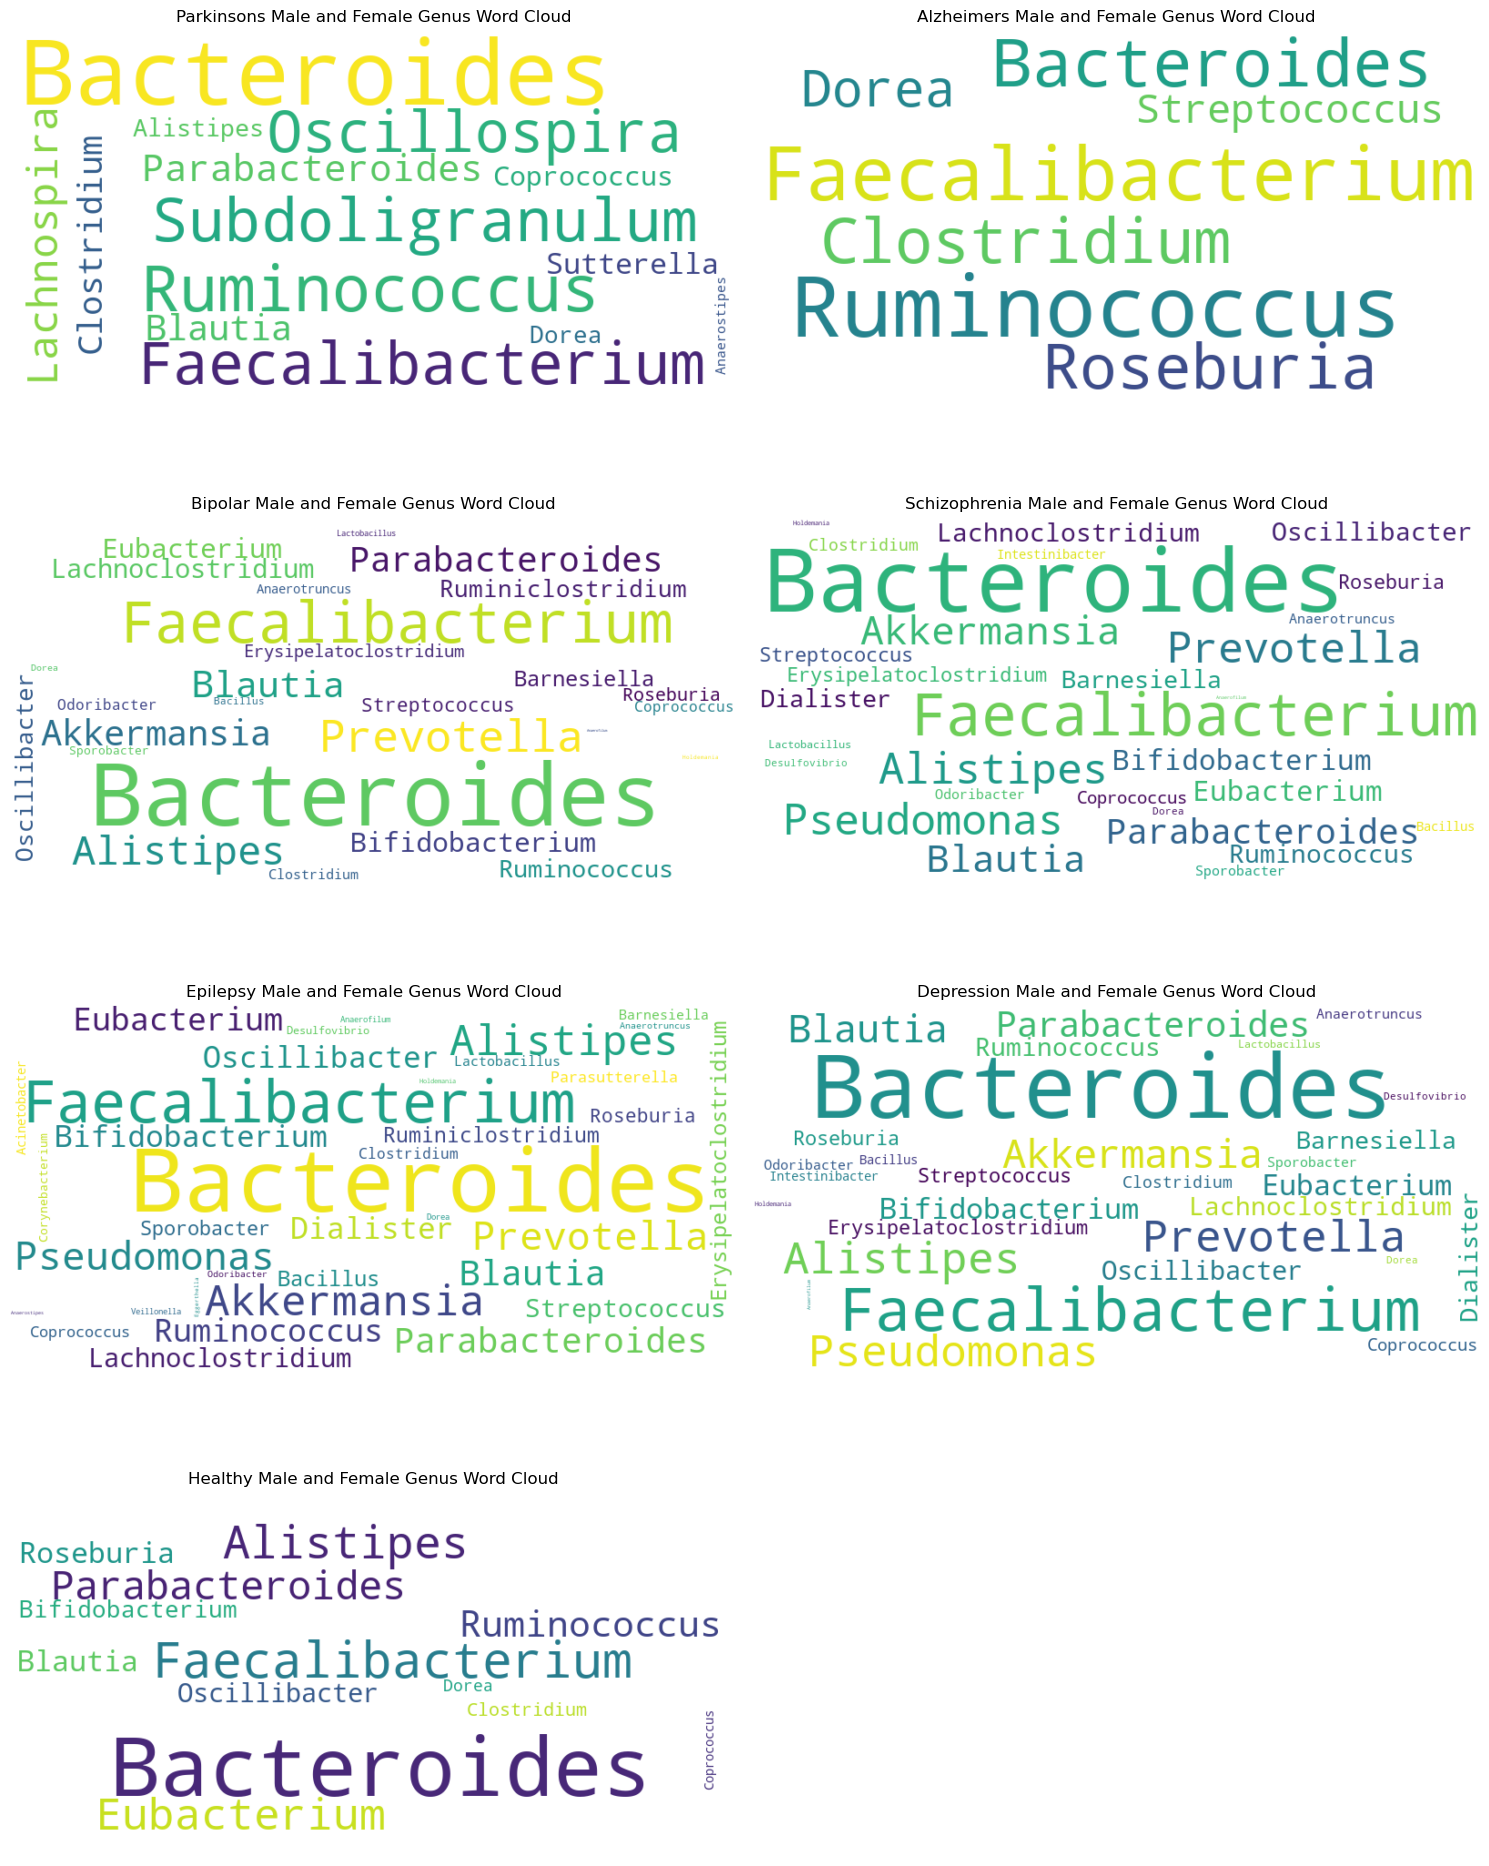

In [390]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten() 

wordclouds = [
    (wordcloud_park, 'Parkinsons Male and Female Genus Word Cloud'),
    (wordcloud_alz, 'Alzheimers Male and Female Genus Word Cloud'),
    (wordcloud_bi, 'Bipolar Male and Female Genus Word Cloud'),
    (wordcloud_sch, 'Schizophrenia Male and Female Genus Word Cloud'),
    (wordcloud_ep, 'Epilepsy Male and Female Genus Word Cloud'),
    (wordcloud_dep, 'Depression Male and Female Genus Word Cloud'),
    (wordcloud_health, 'Healthy Male and Female Genus Word Cloud'),
]

for i, (wc, title) in enumerate(wordclouds):
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(title)

fig.delaxes(axes[-1])

plt.tight_layout()

plt.savefig('wordcloud.jpg')

plt.show()

# Overlayed with Healthy Microbiota

In [392]:
df_bacteria_park.head()

,Alistipes,Bacteroides,Blautia,Clostridium,Coprococcus,Dorea,Faecalibacterium,Lachnospira,Oscillospira,Parabacteroides,Ruminococcus,Subdoligranulum,Sutterella,Anaerostipes
0,0.429130,7.95153,0.441752,1.161180,0.416509,0.403887,5.654420,1.438850,4.65733,0.946611,5.28840,6.10880,0.000000,0.0
1,0.489687,11.36670,0.000000,2.003260,1.290990,0.638077,5.089780,3.502000,3.93233,0.415492,4.76332,4.34783,0.830984,0.0
2,1.345530,30.63360,2.429780,0.966688,0.091443,2.077070,9.627690,1.685170,5.55193,0.431091,5.29066,10.52910,2.259960,0.0
3,0.191301,13.66290,0.402739,1.711640,0.000000,0.332259,4.450260,6.141760,3.03061,1.006850,3.27225,4.19855,2.486910,0.0
4,0.718898,43.93810,0.121847,4.362130,1.291580,0.255879,0.962593,0.718898,1.76678,3.204580,4.30121,1.63275,1.657120,0.0


In [406]:
aggregated_bacteria_data_park = df_bacteria_park.sum()
aggregated_bacteria_data_health = df_bacteria_health.sum()

aggregated_bacteria_data_park_t = pd.DataFrame(aggregated_bacteria_data_park).T
sorted_indices_bact_park = np.argsort(aggregated_bacteria_data_park_t.values.flatten())[::-1]
aggregated_bacteria_data_park_t = aggregated_bacteria_data_park_t.iloc[0, sorted_indices_bact_park]

aggregated_bacteria_data_health_t = pd.DataFrame(aggregated_bacteria_data_health).T
sorted_indices_bact_health = np.argsort(aggregated_bacteria_data_health_t.values.flatten())[::-1]
aggregated_bacteria_data_health_t = aggregated_bacteria_data_health_t.iloc[0, sorted_indices_bact_health]

aggregated_bacteria_data_alz = df_bacteria_alz.sum()
aggregated_bacteria_data_alz_t = pd.DataFrame(aggregated_bacteria_data_alz).T
sorted_indices_bact_alz = np.argsort(aggregated_bacteria_data_alz_t.values.flatten())[::-1]
aggregated_bacteria_data_alz_t = aggregated_bacteria_data_alz_t.iloc[0, sorted_indices_bact_alz]

aggregated_bacteria_data_sch = df_bacteria_sch.sum()
aggregated_bacteria_data_sch_t = pd.DataFrame(aggregated_bacteria_data_sch).T
sorted_indices_bact_sch = np.argsort(aggregated_bacteria_data_sch_t.values.flatten())[::-1]
aggregated_bacteria_data_sch_t = aggregated_bacteria_data_sch_t.iloc[0, sorted_indices_bact_sch]

aggregated_bacteria_data_bi = df_bacteria_bi.sum()
aggregated_bacteria_data_bi_t = pd.DataFrame(aggregated_bacteria_data_bi).T
sorted_indices_bact_bi = np.argsort(aggregated_bacteria_data_bi_t.values.flatten())[::-1]
aggregated_bacteria_data_bi_t = aggregated_bacteria_data_bi_t.iloc[0, sorted_indices_bact_bi]

aggregated_bacteria_data_ep = df_bacteria_ep.sum()
aggregated_bacteria_data_ep_t = pd.DataFrame(aggregated_bacteria_data_ep).T
sorted_indices_bact_ep = np.argsort(aggregated_bacteria_data_ep_t.values.flatten())[::-1]
aggregated_bacteria_data_ep_t = aggregated_bacteria_data_ep_t.iloc[0, sorted_indices_bact_ep]

aggregated_bacteria_data_dep = df_bacteria_dep.sum()
aggregated_bacteria_data_dep_t = pd.DataFrame(aggregated_bacteria_data_dep).T
sorted_indices_bact_dep = np.argsort(aggregated_bacteria_data_dep_t.values.flatten())[::-1]
aggregated_bacteria_data_dep_t = aggregated_bacteria_data_dep_t.iloc[0, sorted_indices_bact_dep]

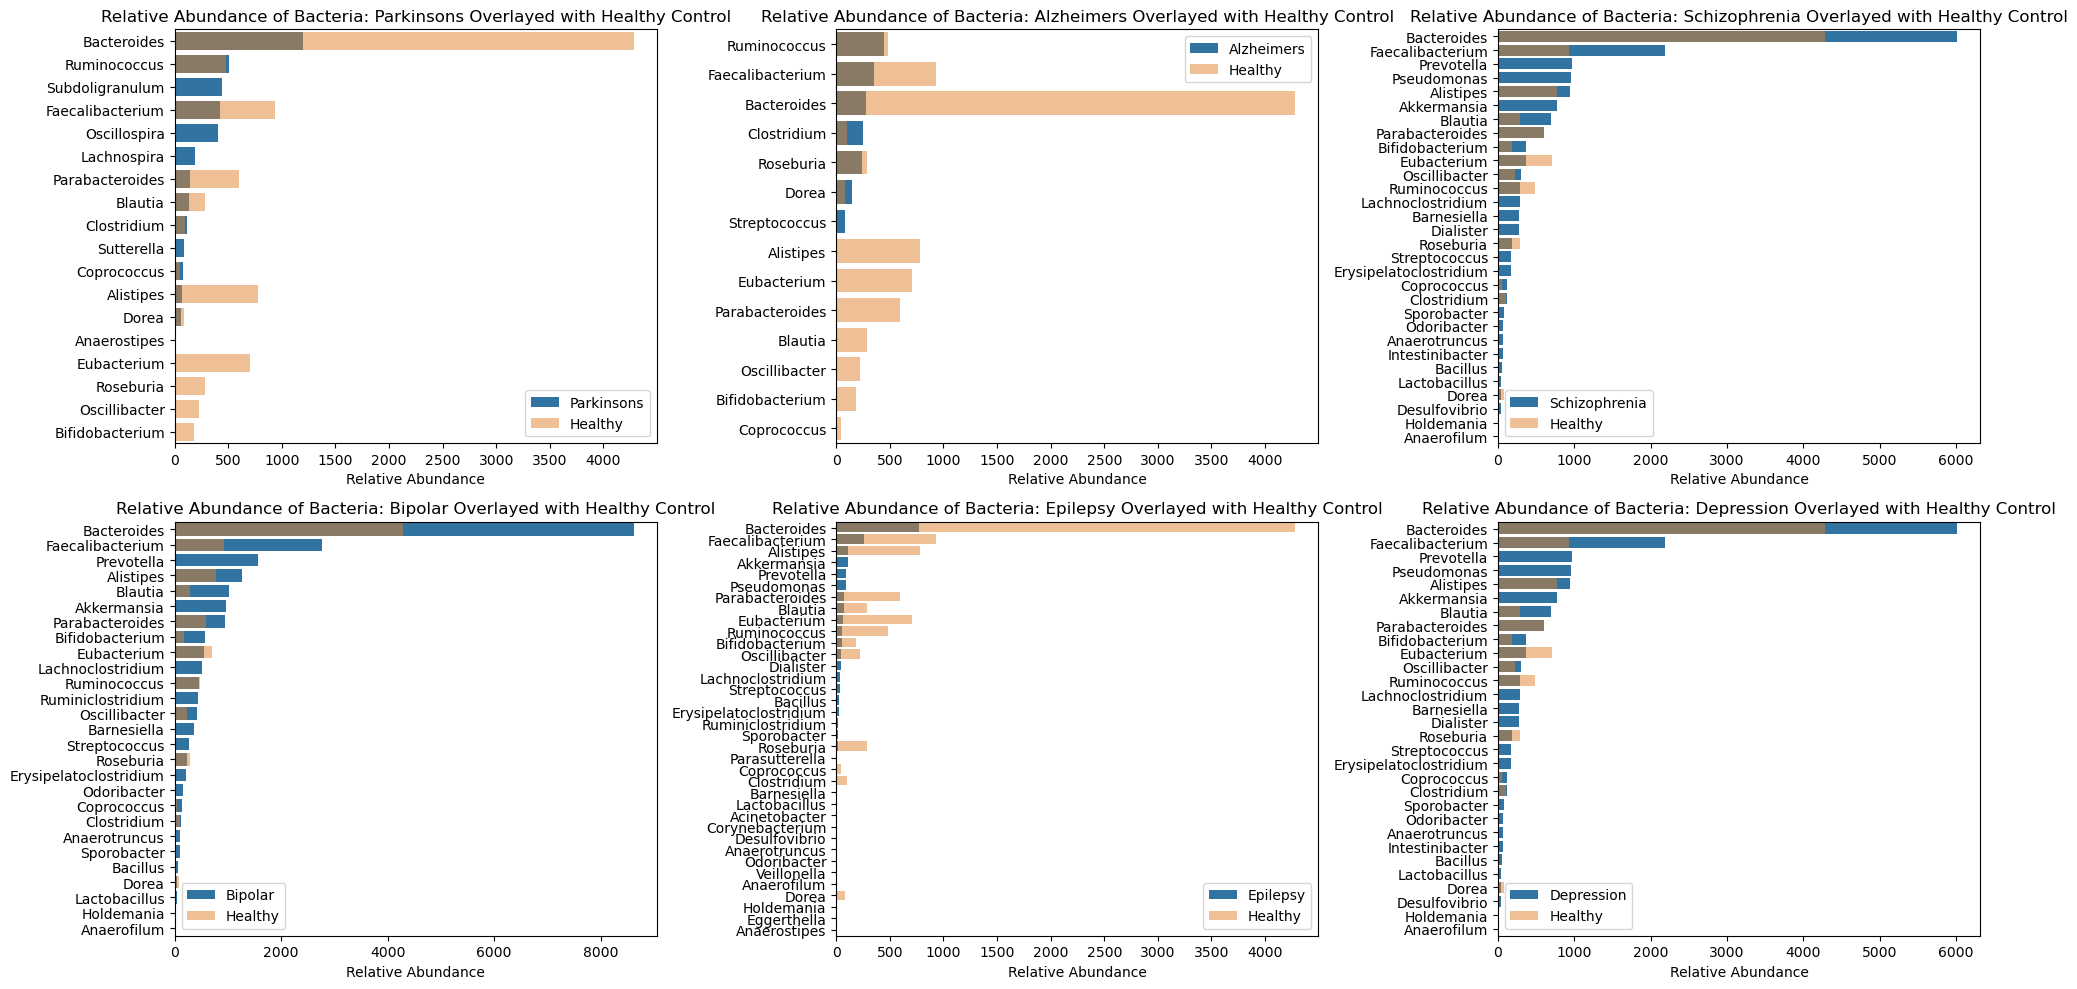

In [412]:
plot_data = [
    (aggregated_bacteria_data_park_t, 'Parkinsons', 
     'Relative Abundance of Bacteria: Parkinsons Overlayed with Healthy Control'),
    (aggregated_bacteria_data_alz_t, 'Alzheimers', 
     'Relative Abundance of Bacteria: Alzheimers Overlayed with Healthy Control'),
    (aggregated_bacteria_data_sch_t, 'Schizophrenia', 
     'Relative Abundance of Bacteria: Schizophrenia Overlayed with Healthy Control'),
    (aggregated_bacteria_data_bi_t, 'Bipolar', 
     'Relative Abundance of Bacteria: Bipolar Overlayed with Healthy Control'),
    (aggregated_bacteria_data_ep_t, 'Epilepsy', 
     'Relative Abundance of Bacteria: Epilepsy Overlayed with Healthy Control'),
    (aggregated_bacteria_data_dep_t, 'Depression', 
     'Relative Abundance of Bacteria: Depression Overlayed with Healthy Control'),
]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten() 

for i, (data, label, title) in enumerate(plot_data):
    sns.barplot(data, orient='h', label=label, ax=axes[i])
    sns.barplot(aggregated_bacteria_data_health_t, orient='h', alpha=0.5, label='Healthy', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel('Relative Abundance')
    axes[i].legend()

    
plt.tight_layout()

plt.savefig('overlay.jpg')

plt.show()